In [4]:
#% shift enter to run section
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
import numpy as np
import numpy.ma as ma
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('ggplot')
import xarray as xr
from glob import glob
import netCDF4
from netCDF4 import Dataset
import matplotlib.mlab as mlab
import pylab
import pyreadr
import seaborn as sns
import tqdm
import tzlocal
import sys
import os
import scipy.interpolate as sc
from scipy import signal
my_timezone = tzlocal.get_localzone().zone
# pylab for more MATLAB like environment and inline displays plots below cells
%pylab inline

# if gsw Warning shows, manually install gsw if possible - will still work without
import glidertools as gt
from cmocean import cm as cmo  # we use this for colormaps
#del()
import geostatspy.GSLIB as GSLIB 
import geostatspy.geostats as geostats 
import scipy.stats   
from skgstat import Variogram
import pykrige

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [63]:
#36 #48 
#SealIDS = np.array([19,36,47,48,53,58,62,64,67,66,68,70,109]).astype(int)
#SealIDS = np.array([1,2,4,5,13,14,15,16,17,18,19,20,21,22,23,24,25,31,36,47,48,49,50,51,52,53,57,58,62,63,64,65,66,67,68,69,70,109,110,111,112,113]).astype(int)
SealIDS = np.array([49,50,51,52,53,57,58,62,63,64,65,66,67,68,69,70,109,110,111,112,113]).astype(int)

49


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (320749). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
50


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (1328681). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
51


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (728719). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
52


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (265336). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
53


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.75
There are a large number of points to plot (345277). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
57


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.75
58


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (108668). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
62


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 1.00
There are a large number of points to plot (1925255). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
63


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (312419). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
64


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (273596). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
65


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (232790). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
66


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
67


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 1.00
There are a large number of points to plot (212730). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
68


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (679387). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
69


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 1.00
There are a large number of points to plot (1172204). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
70


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (611736). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
109


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (295103). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
110


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (162533). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
111


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (203017). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
112


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.50
There are a large number of points to plot (302612). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y
113


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.75
There are a large number of points to plot (116930). This will take a while to plot.
Type "y" to continue or "n" to cancel.
y


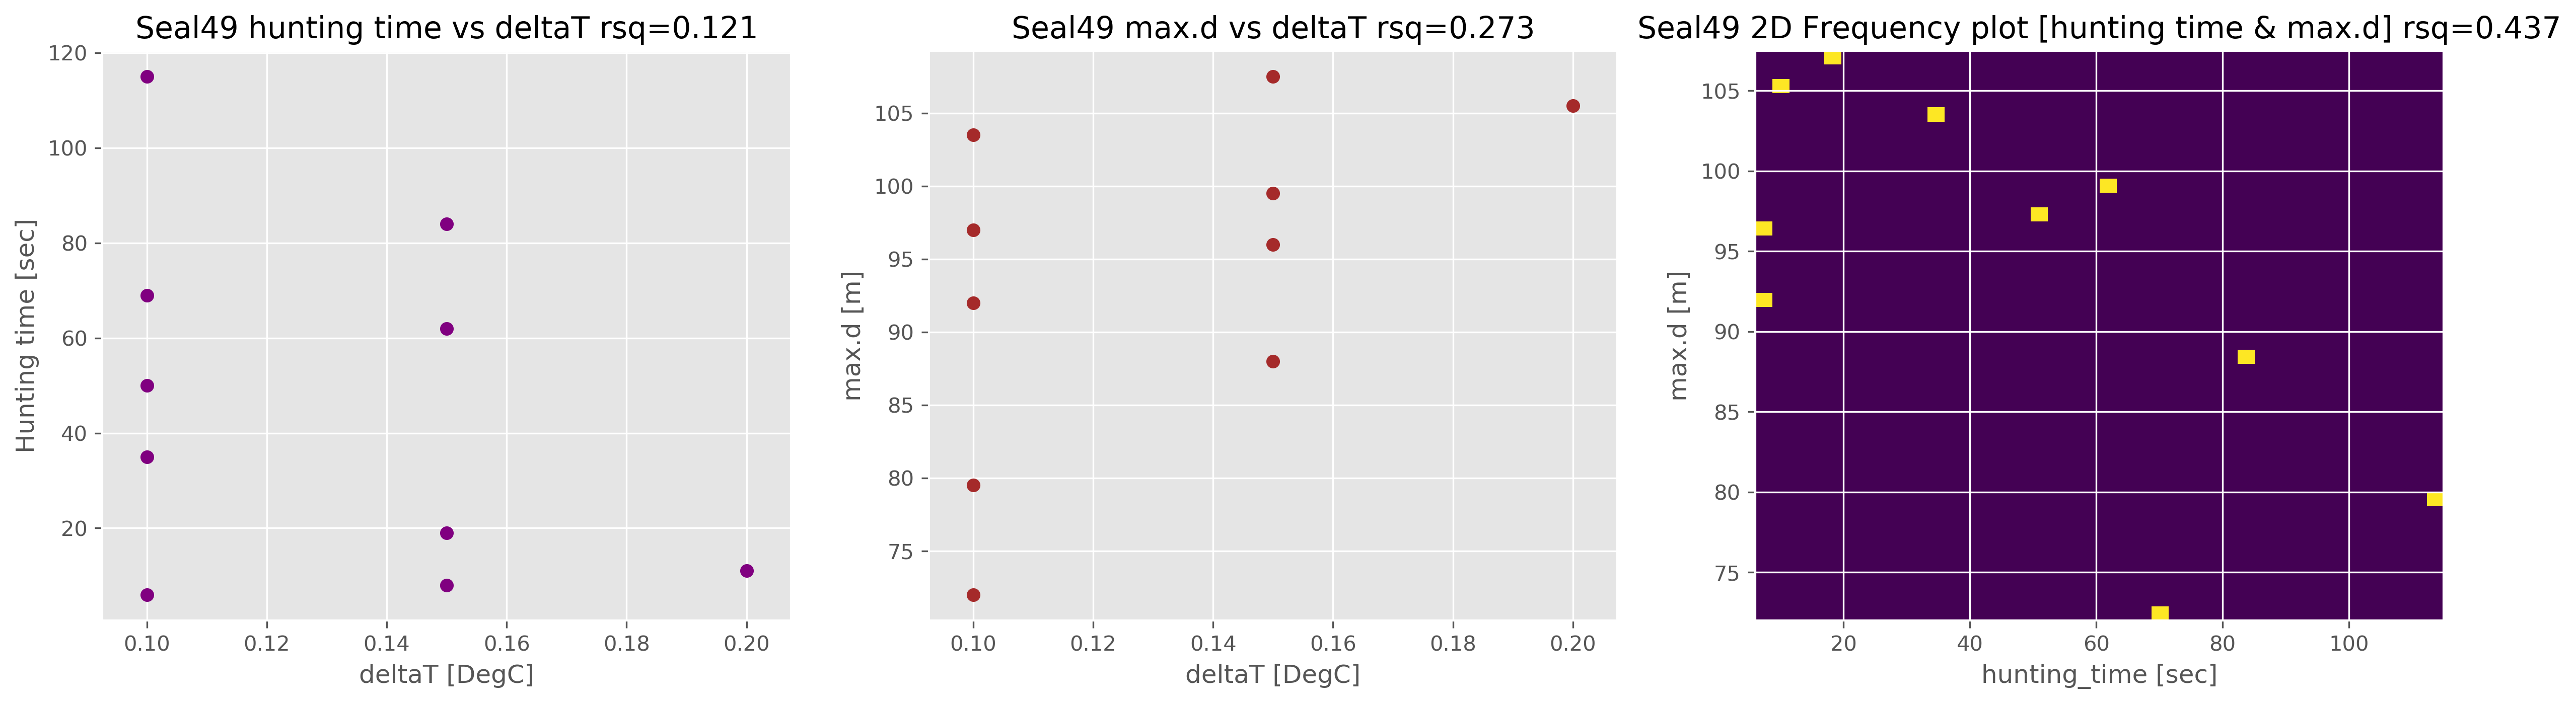

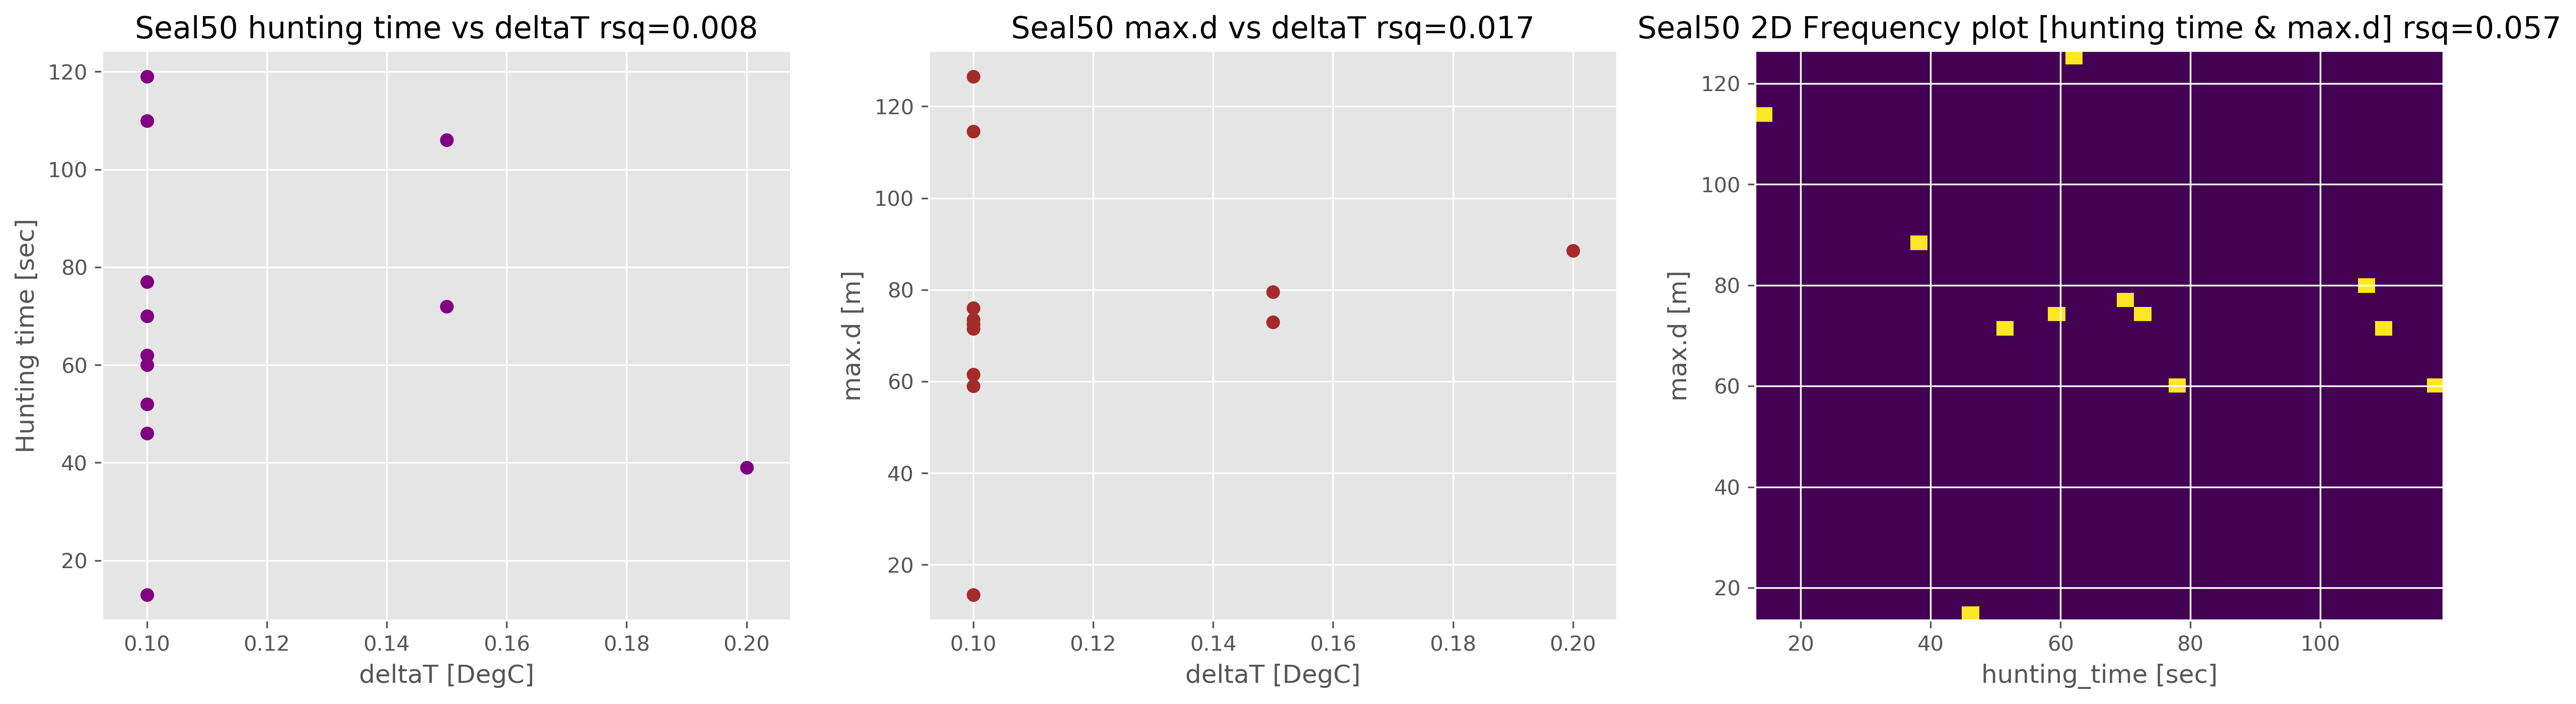

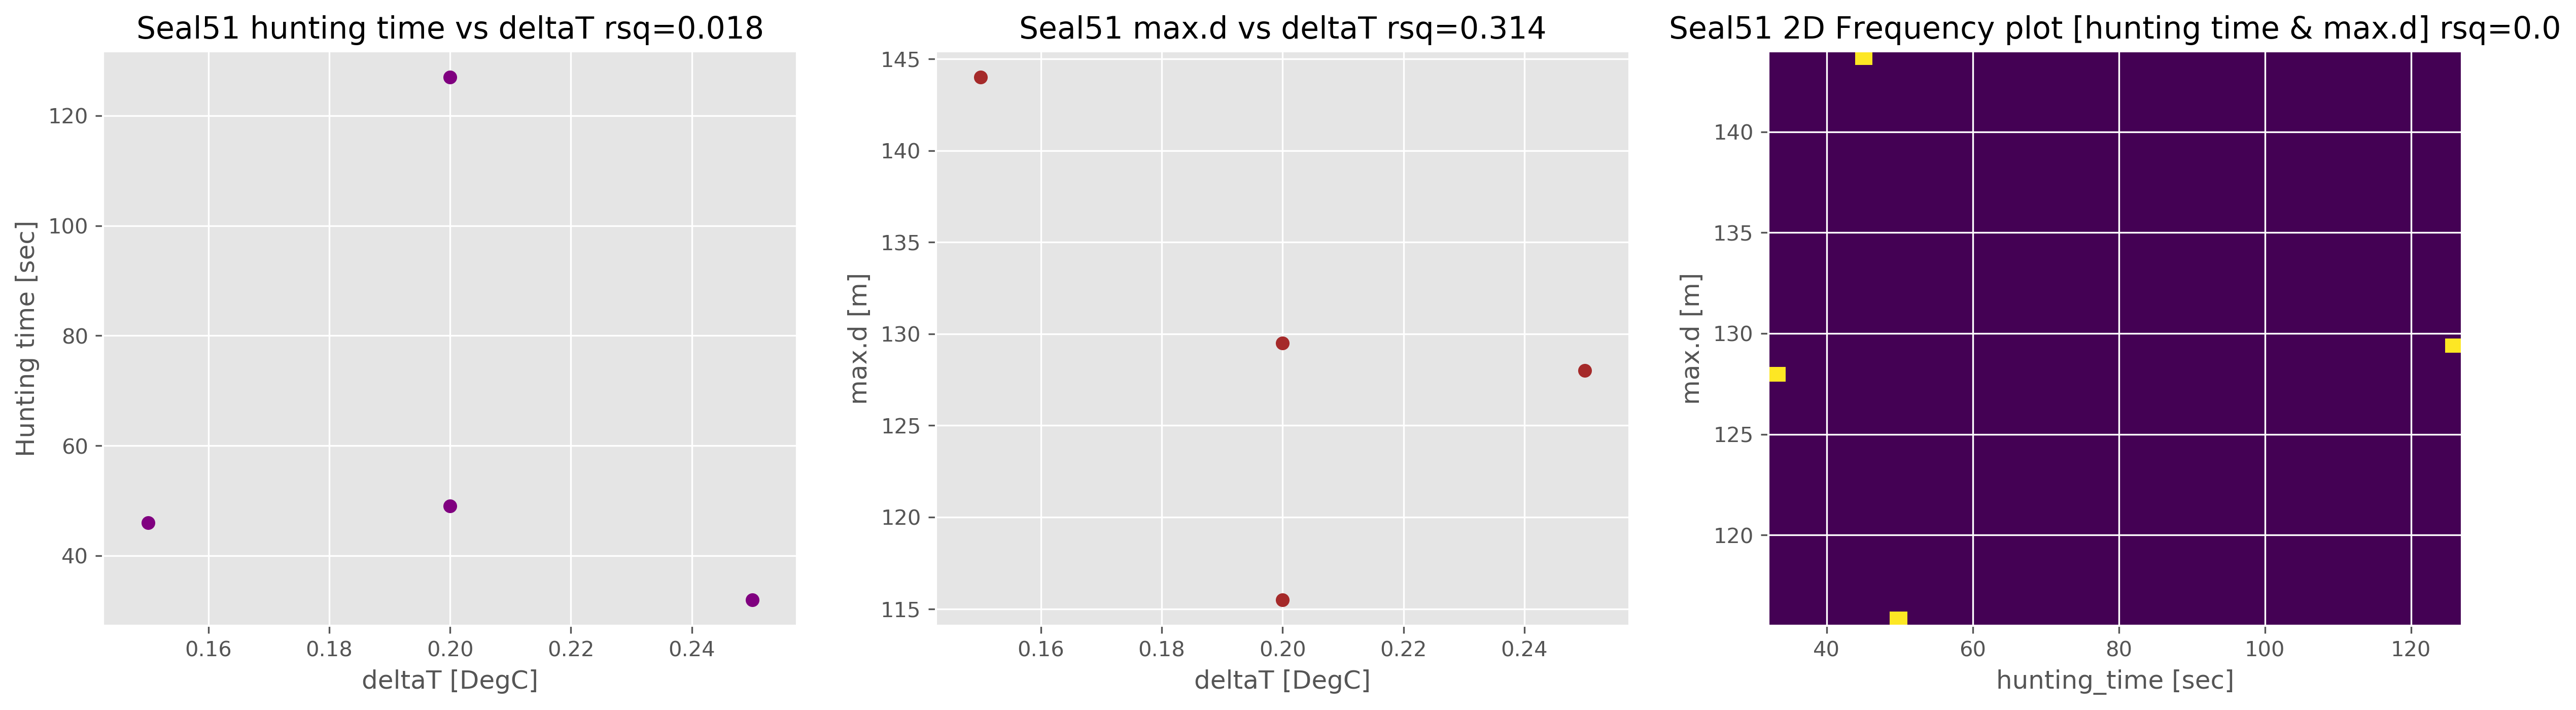

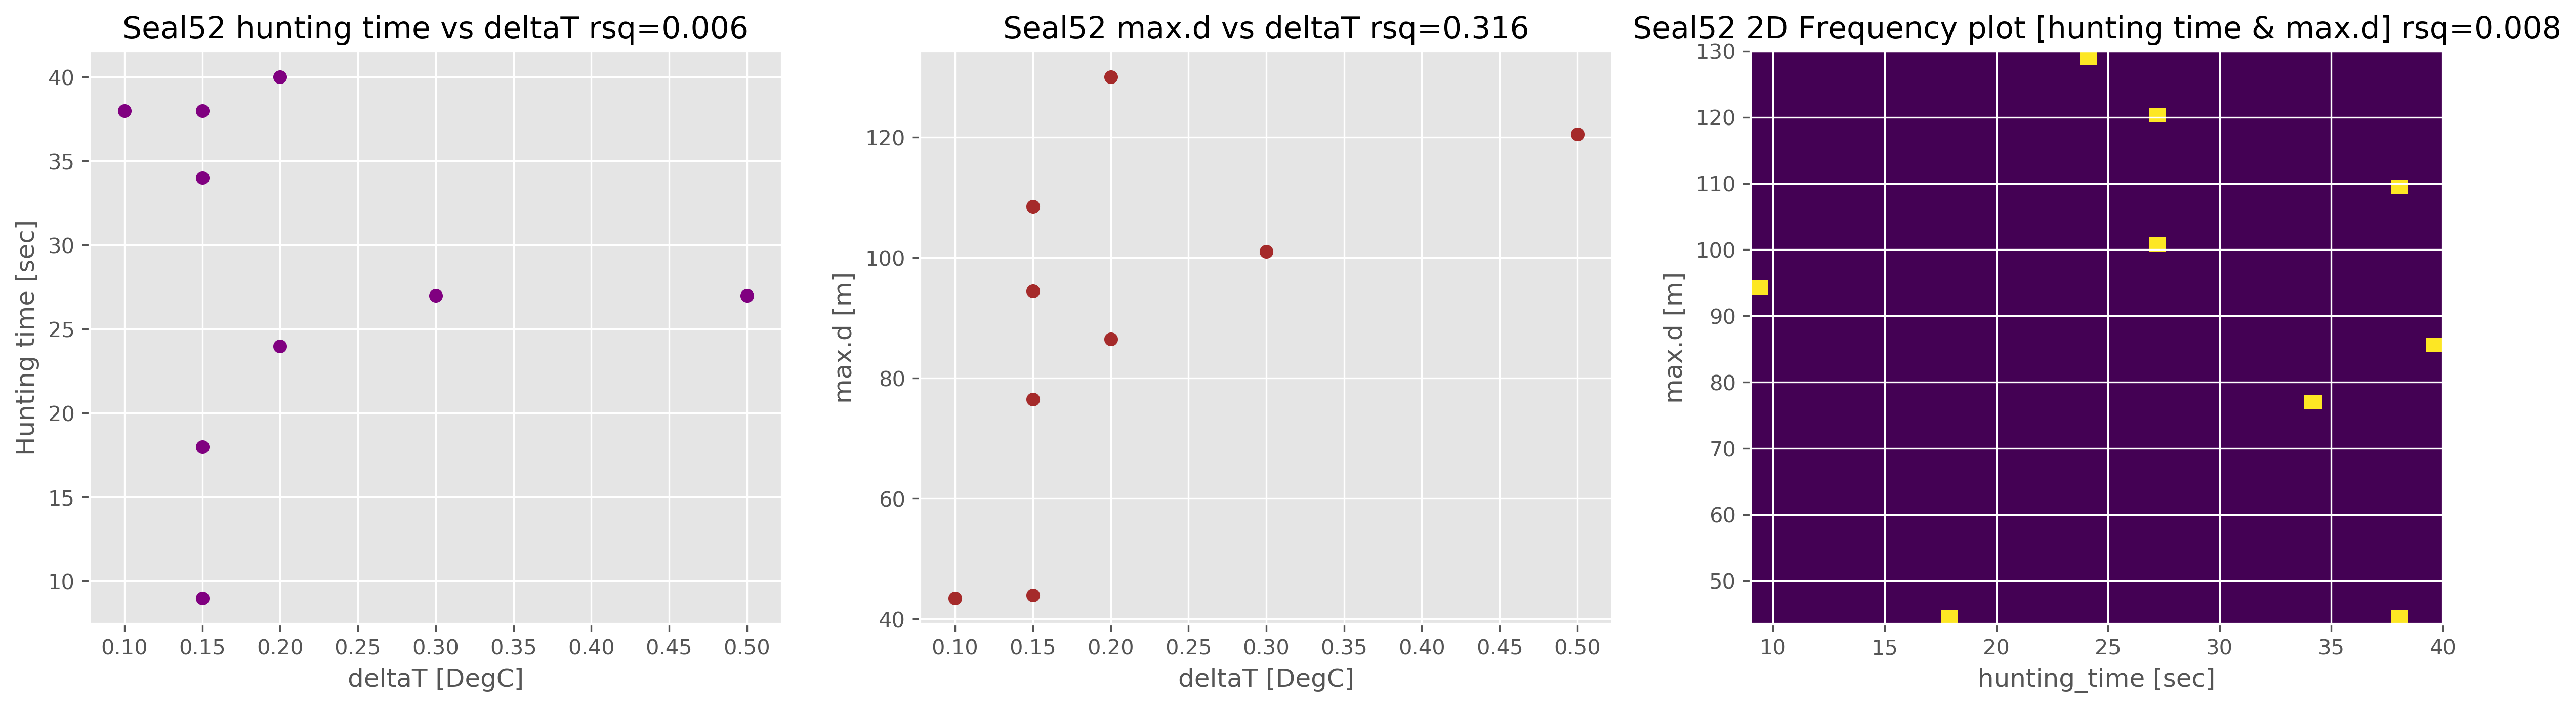

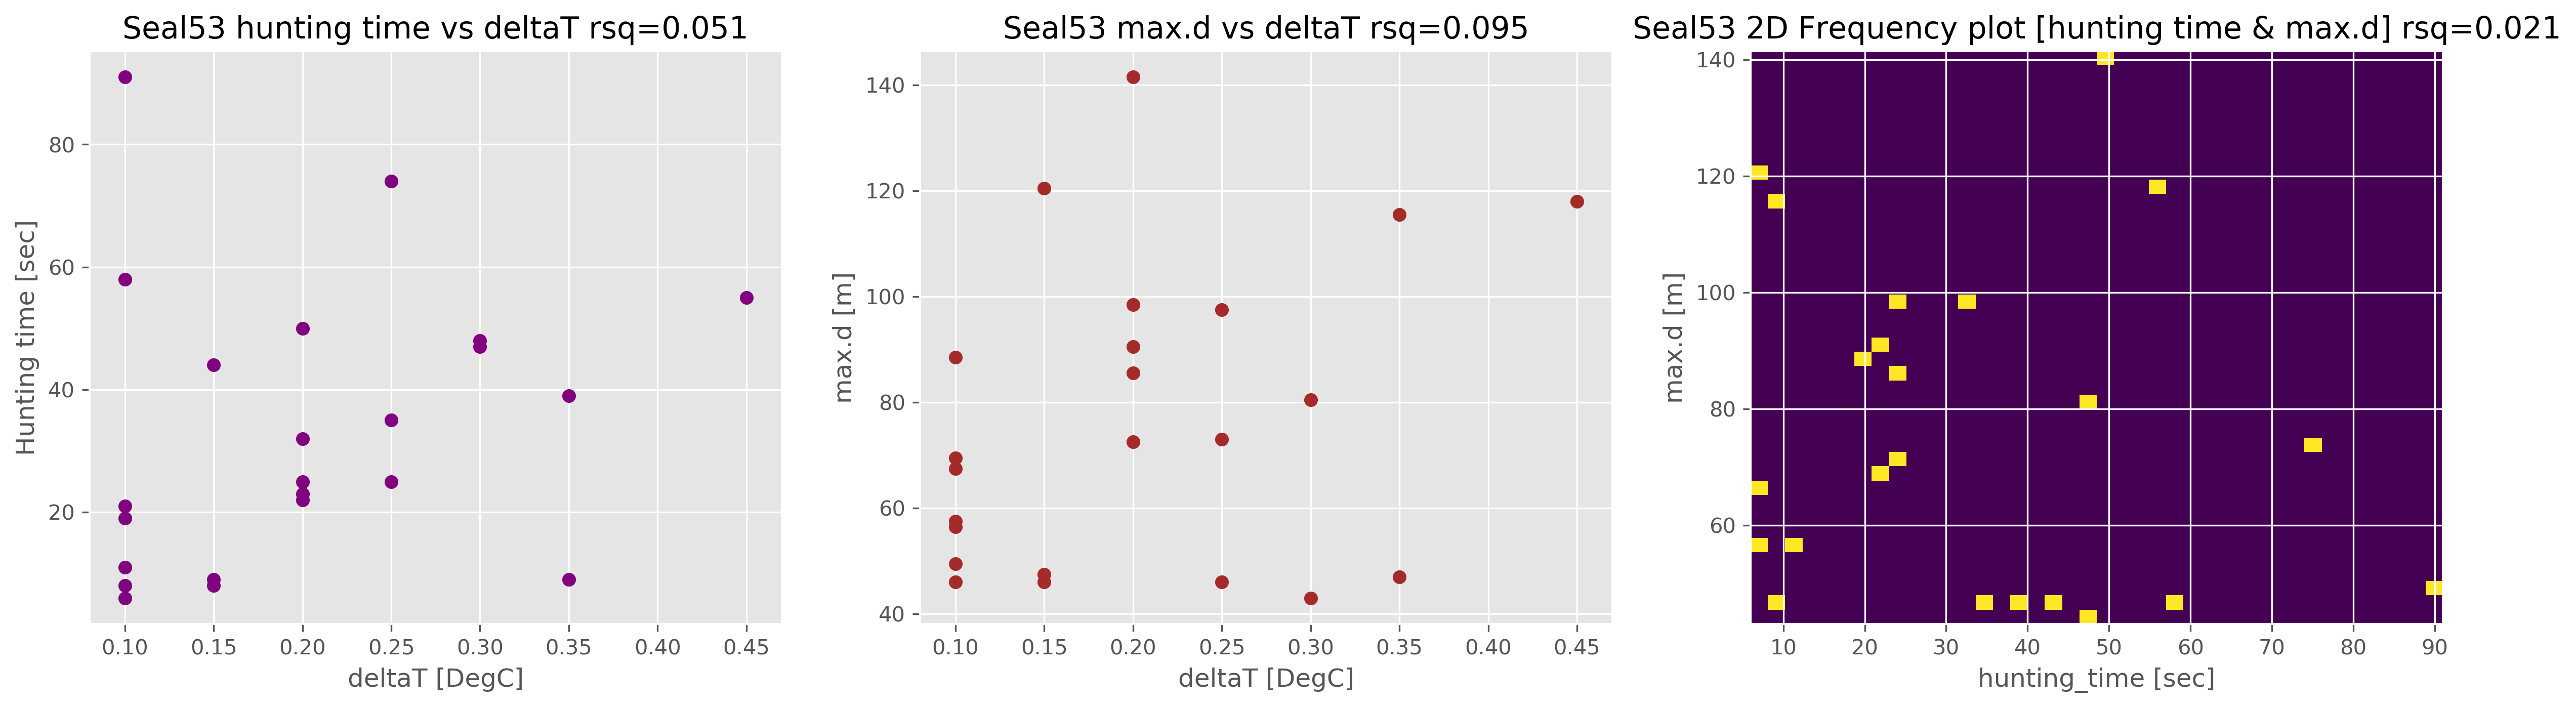

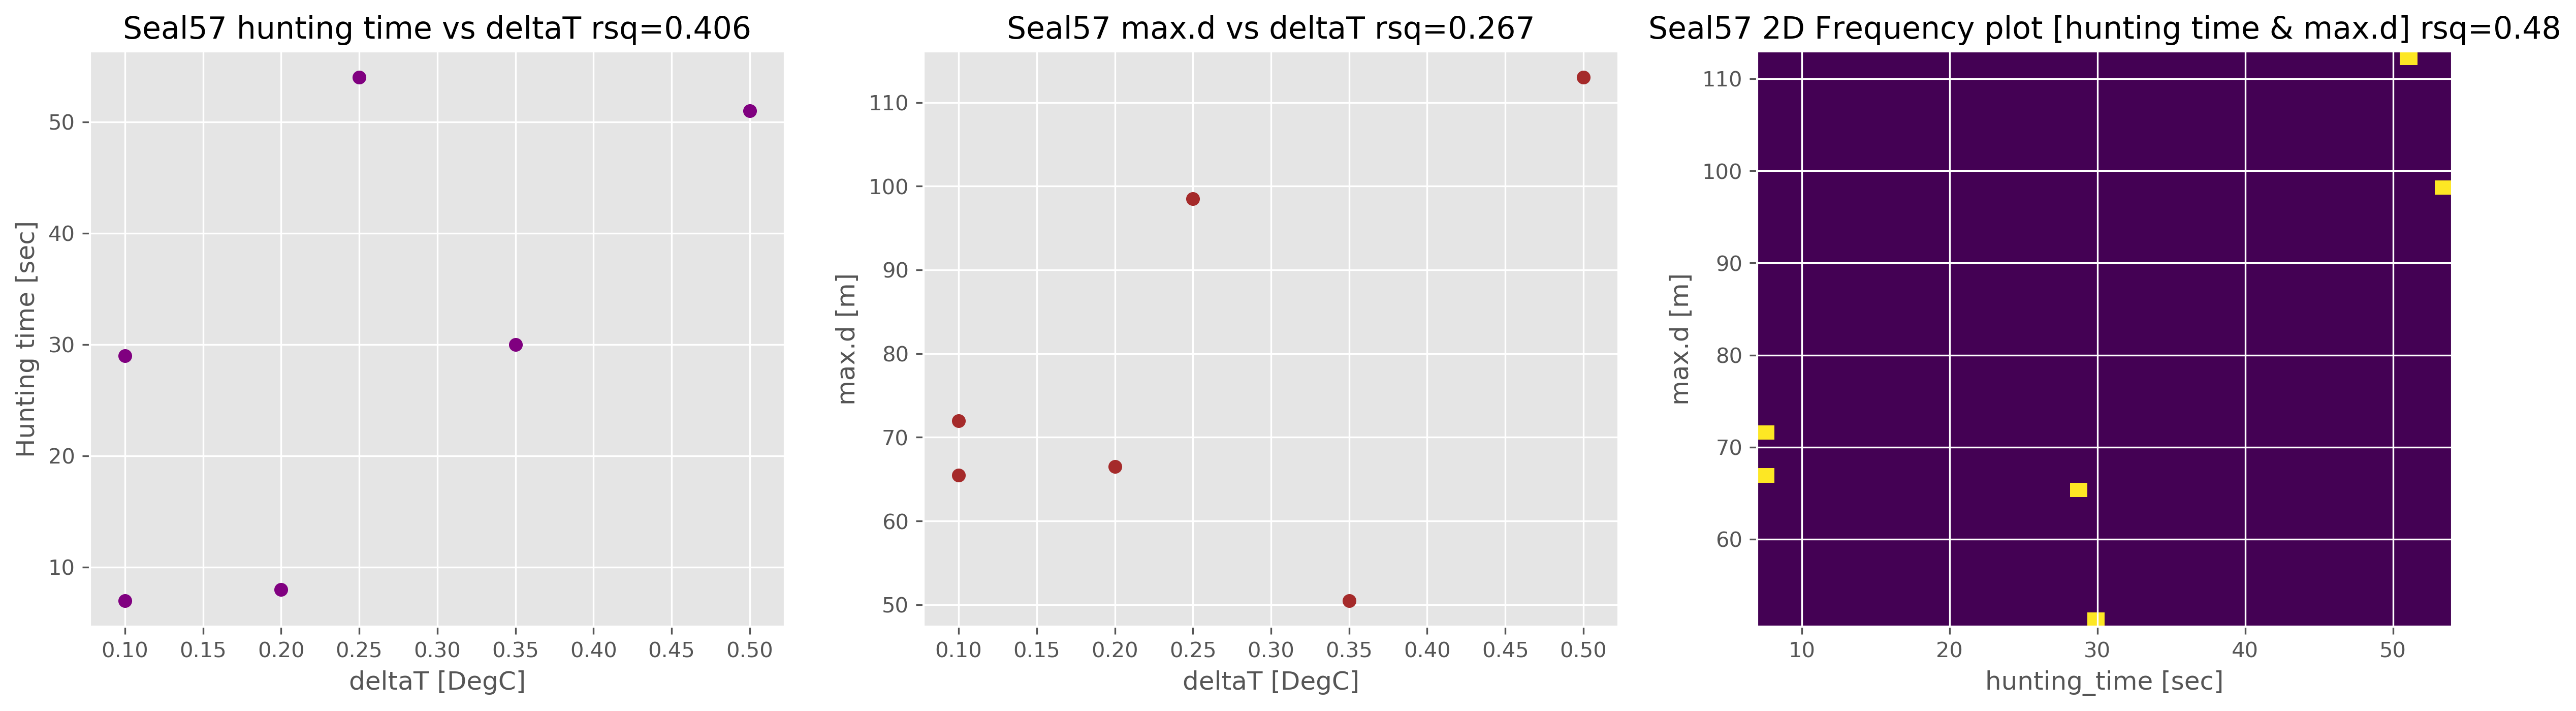

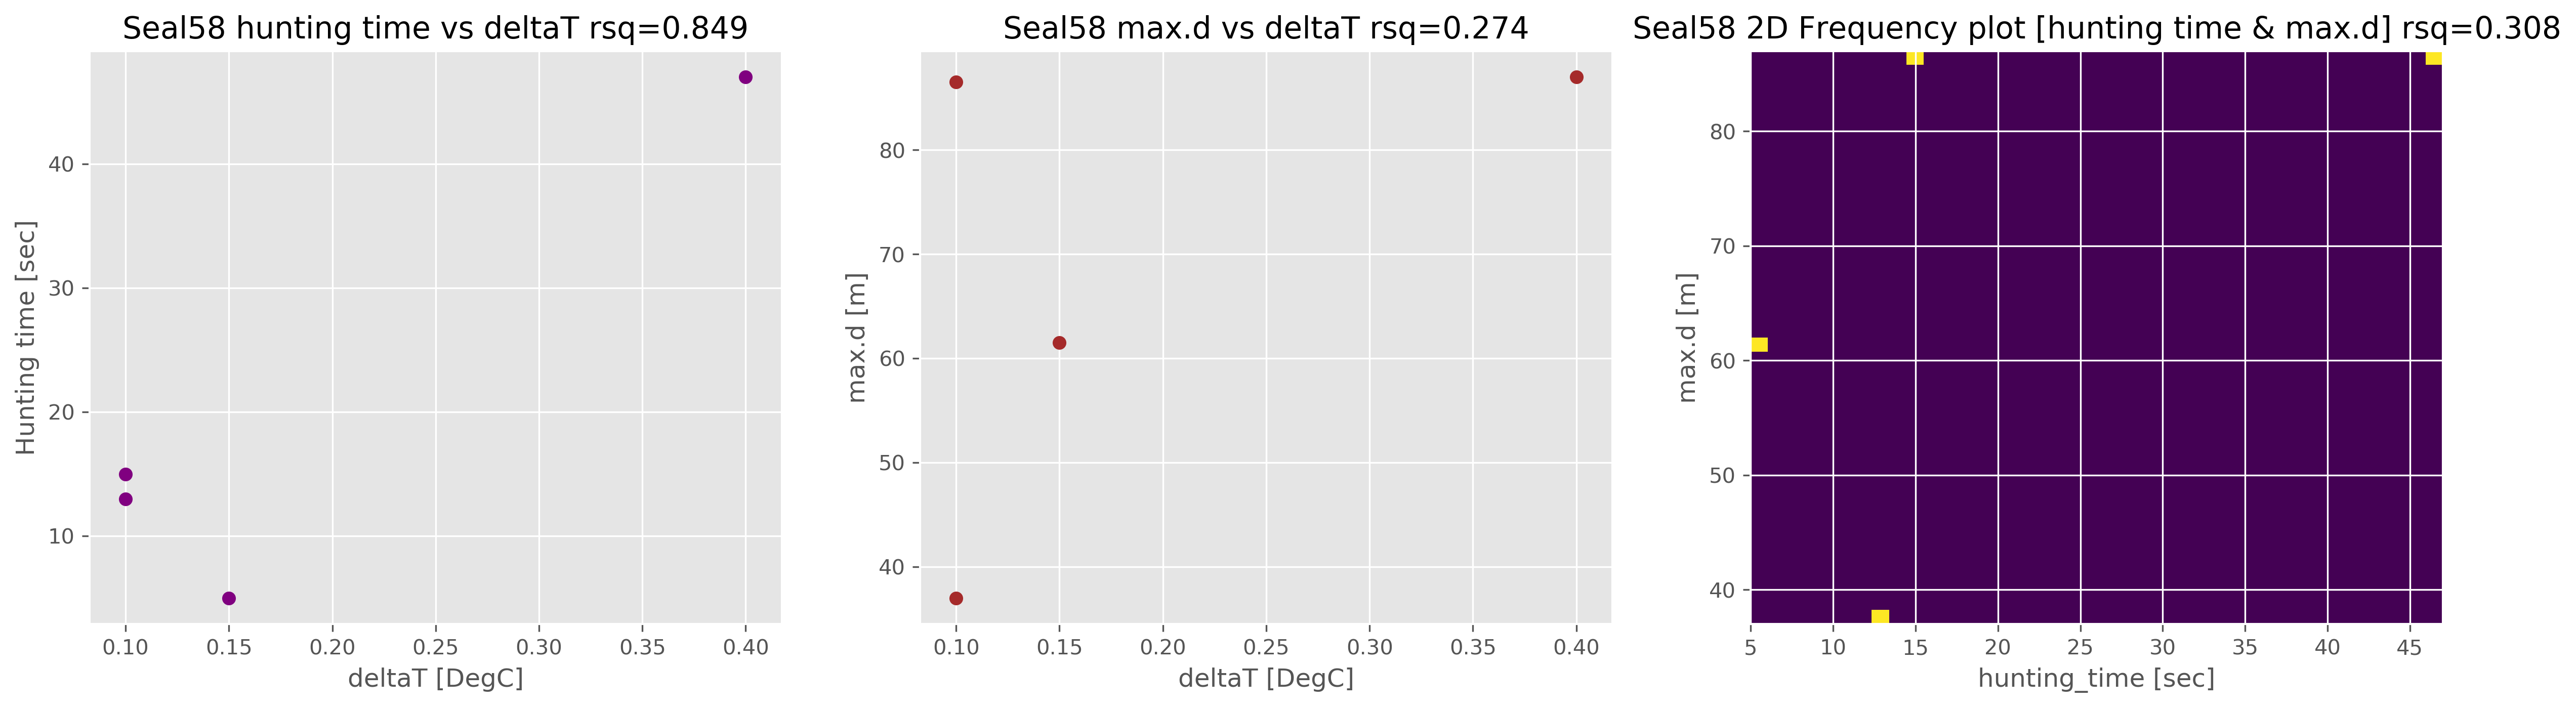

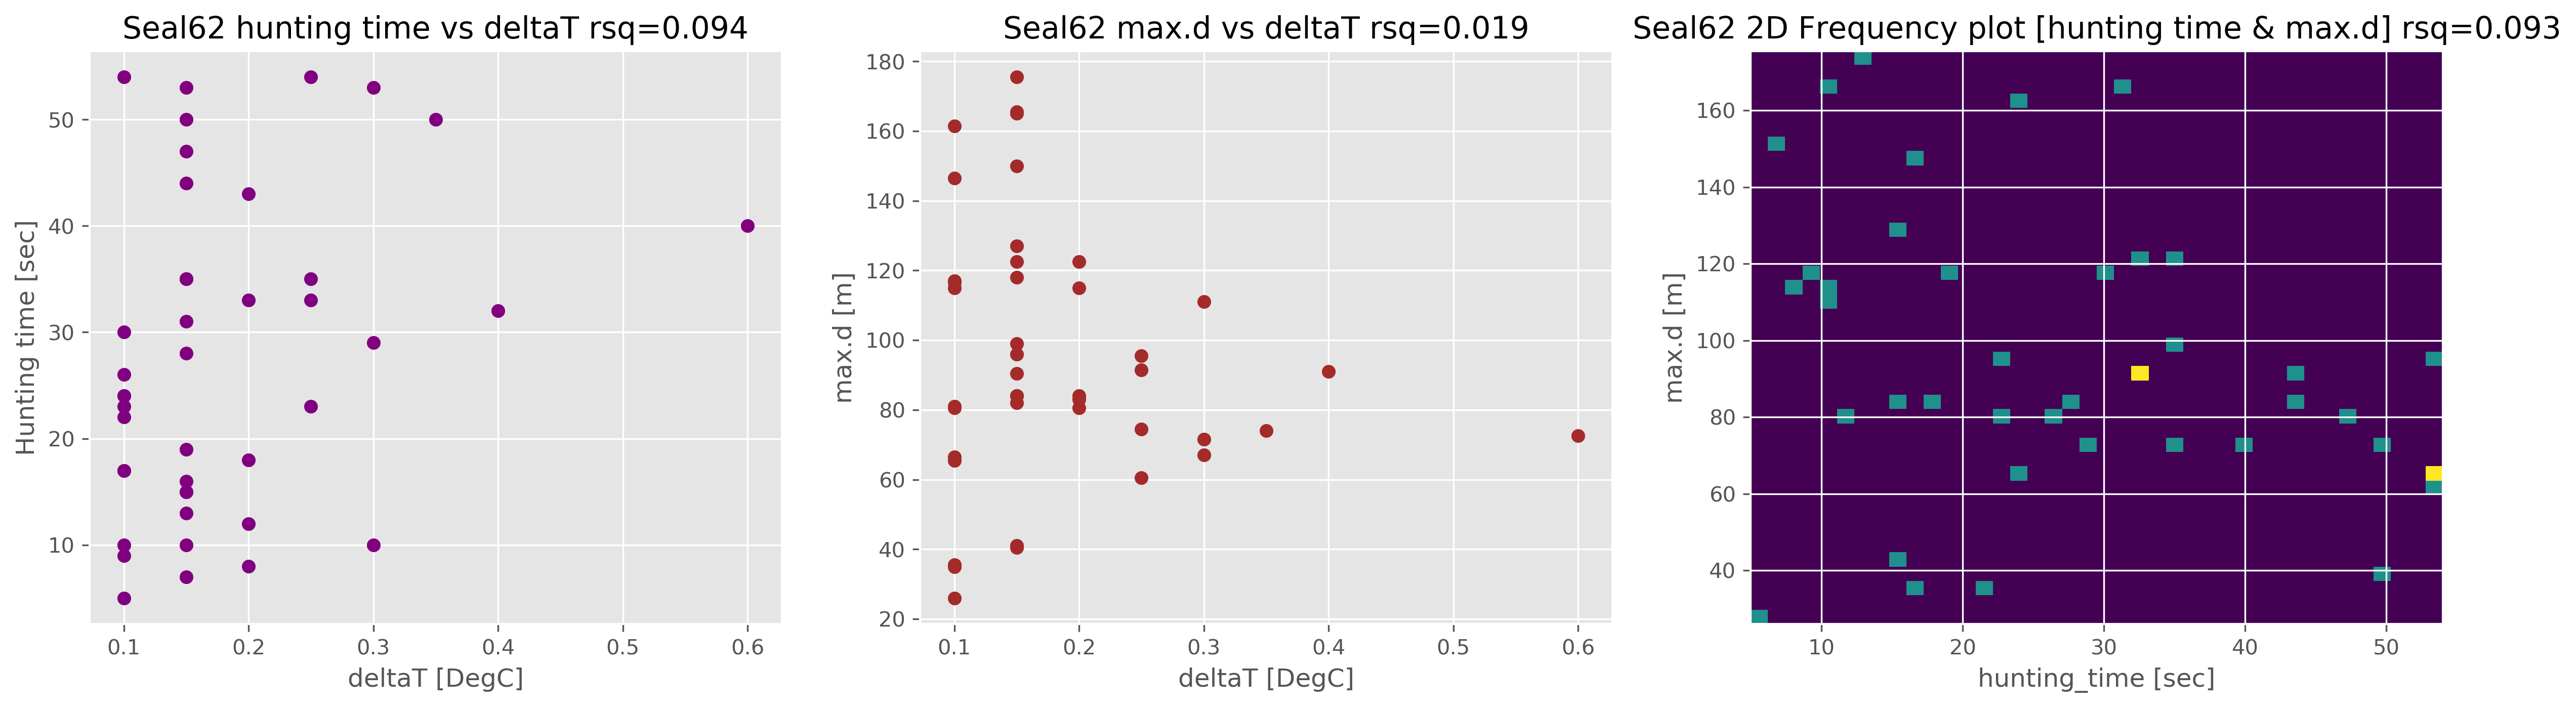

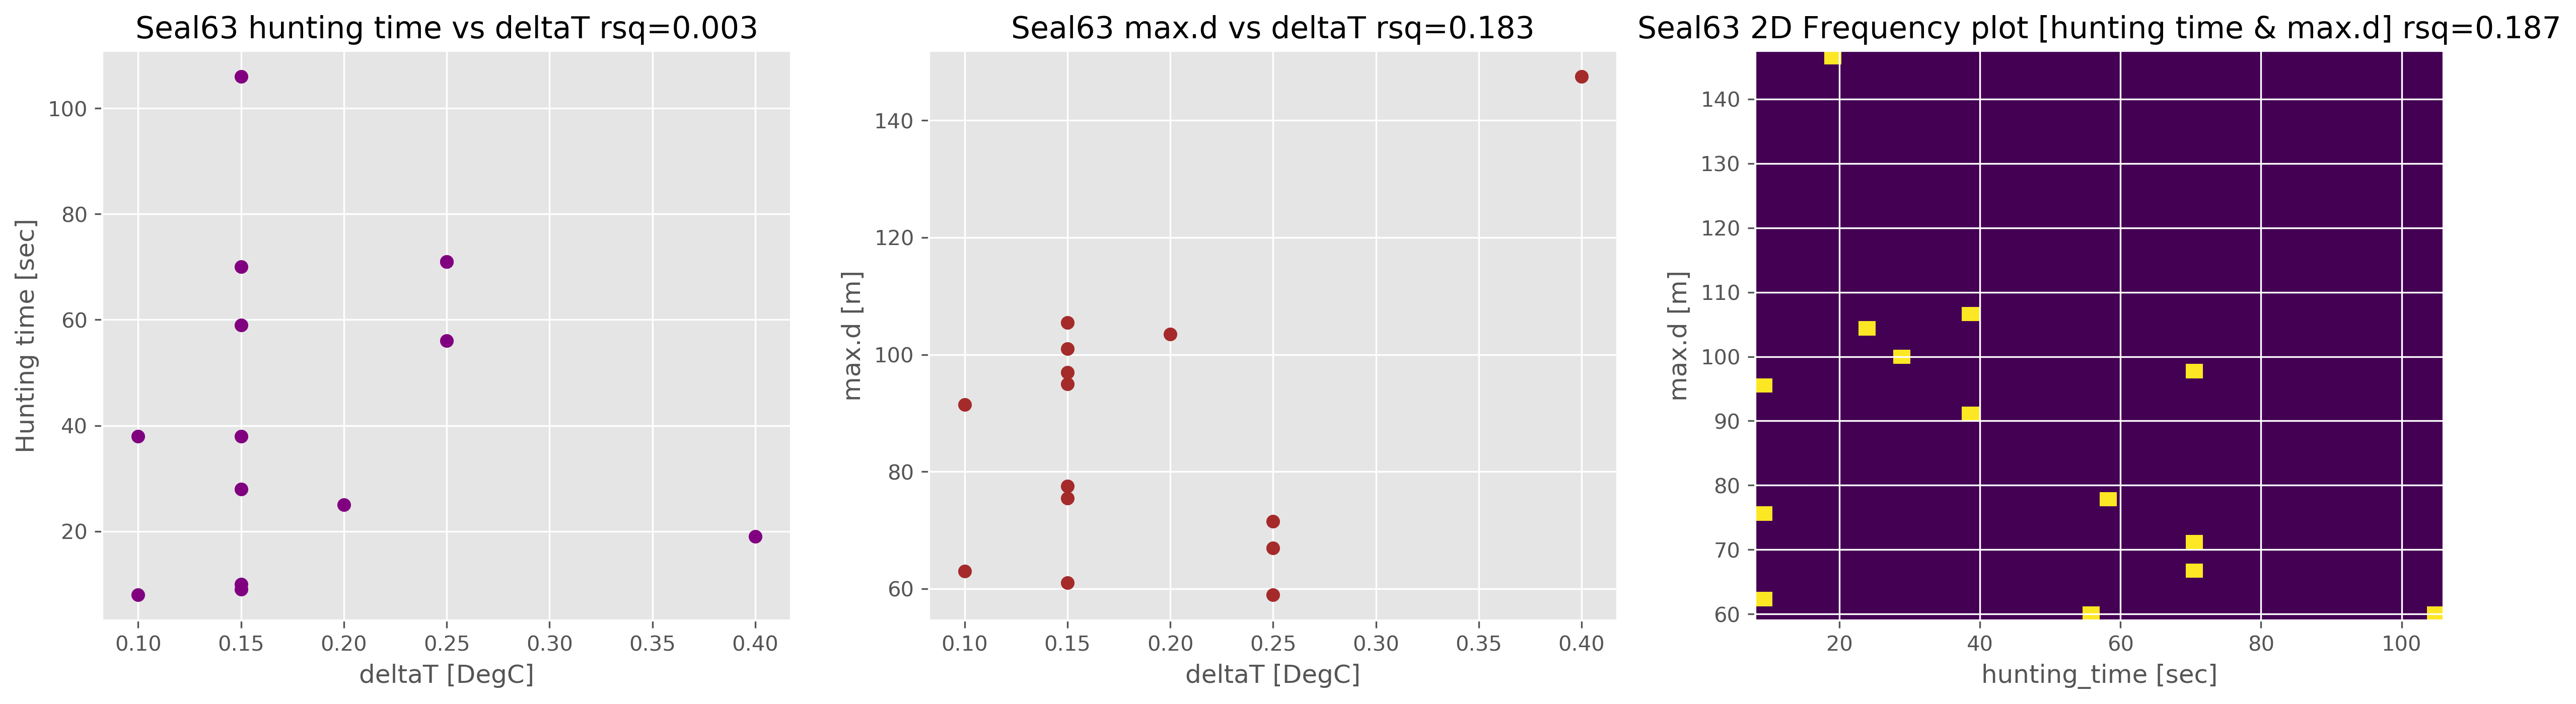

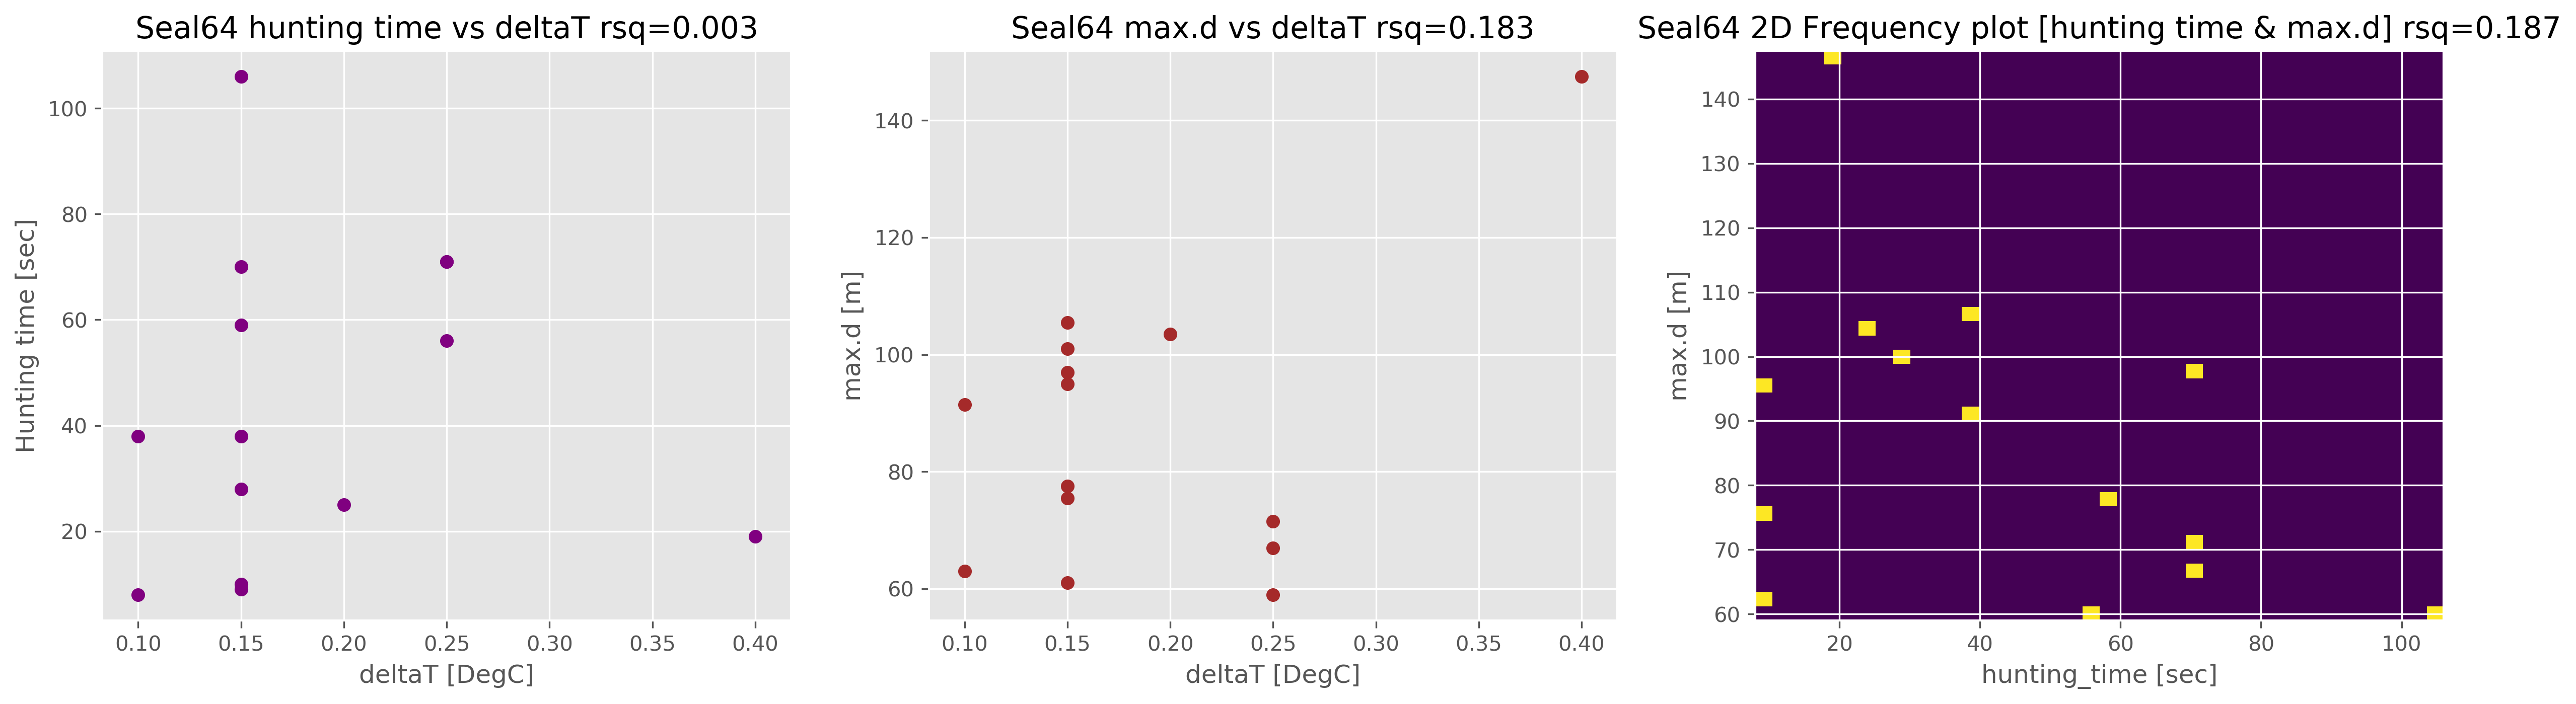

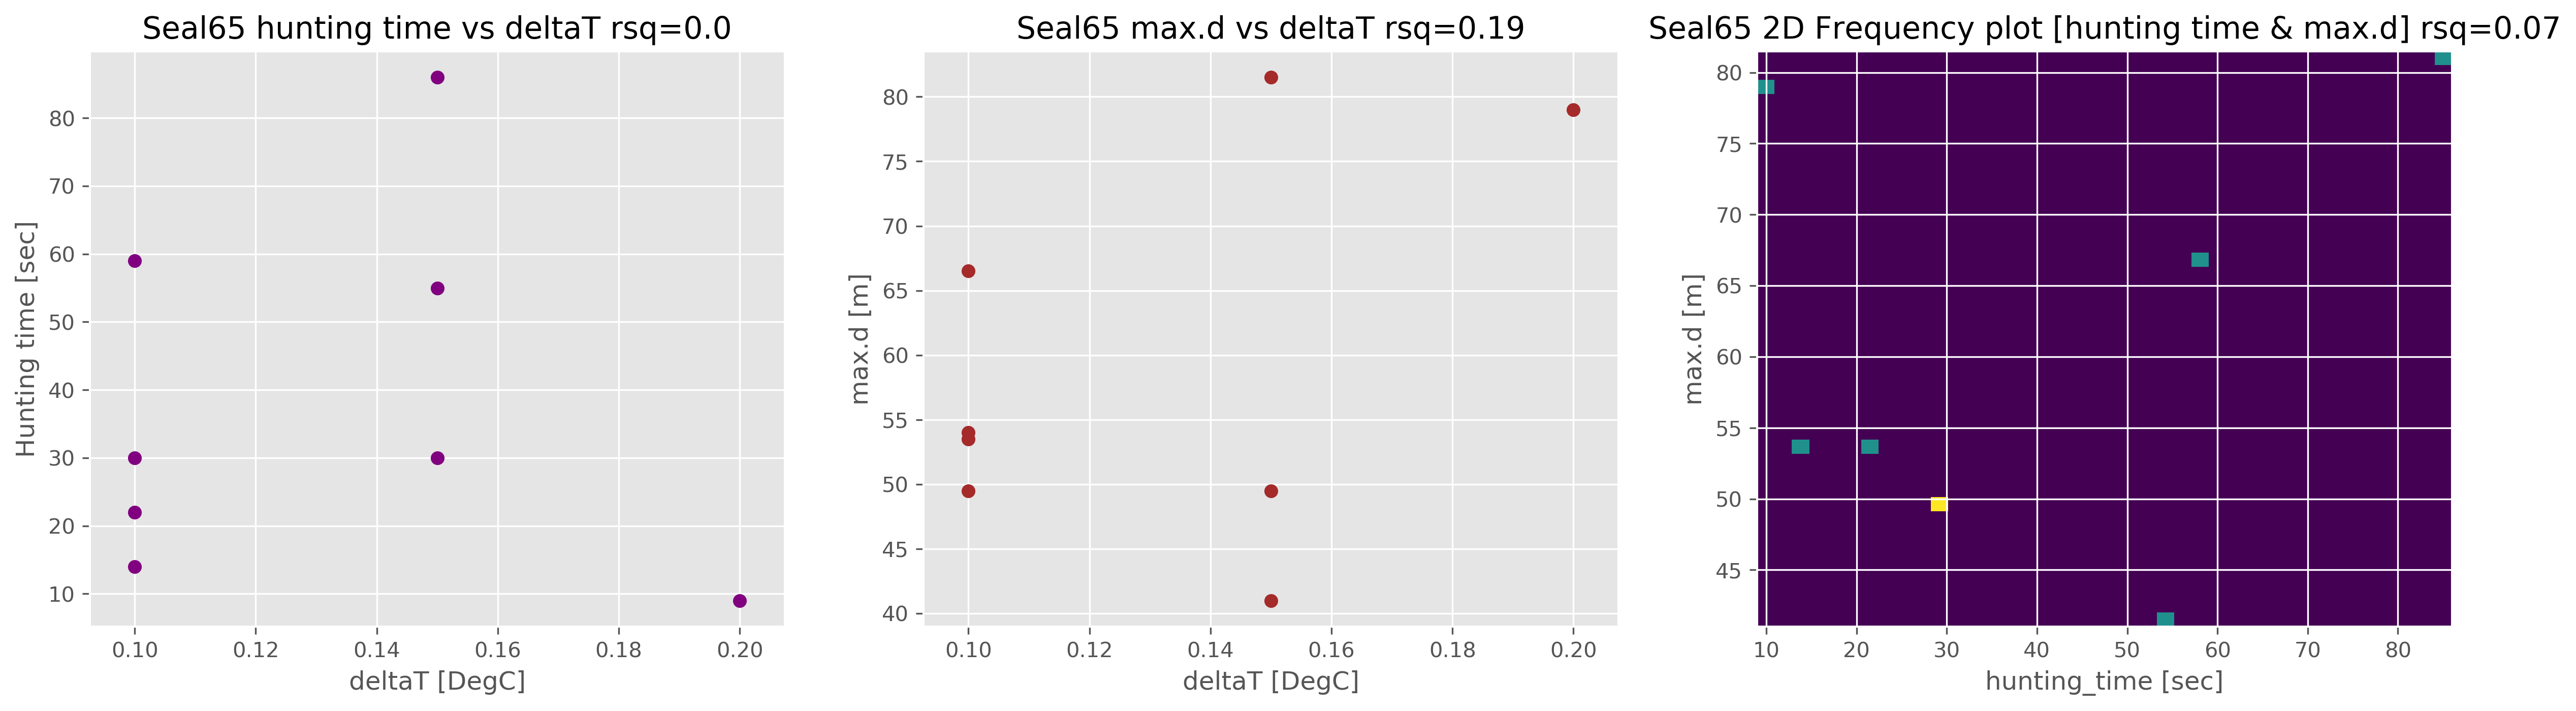

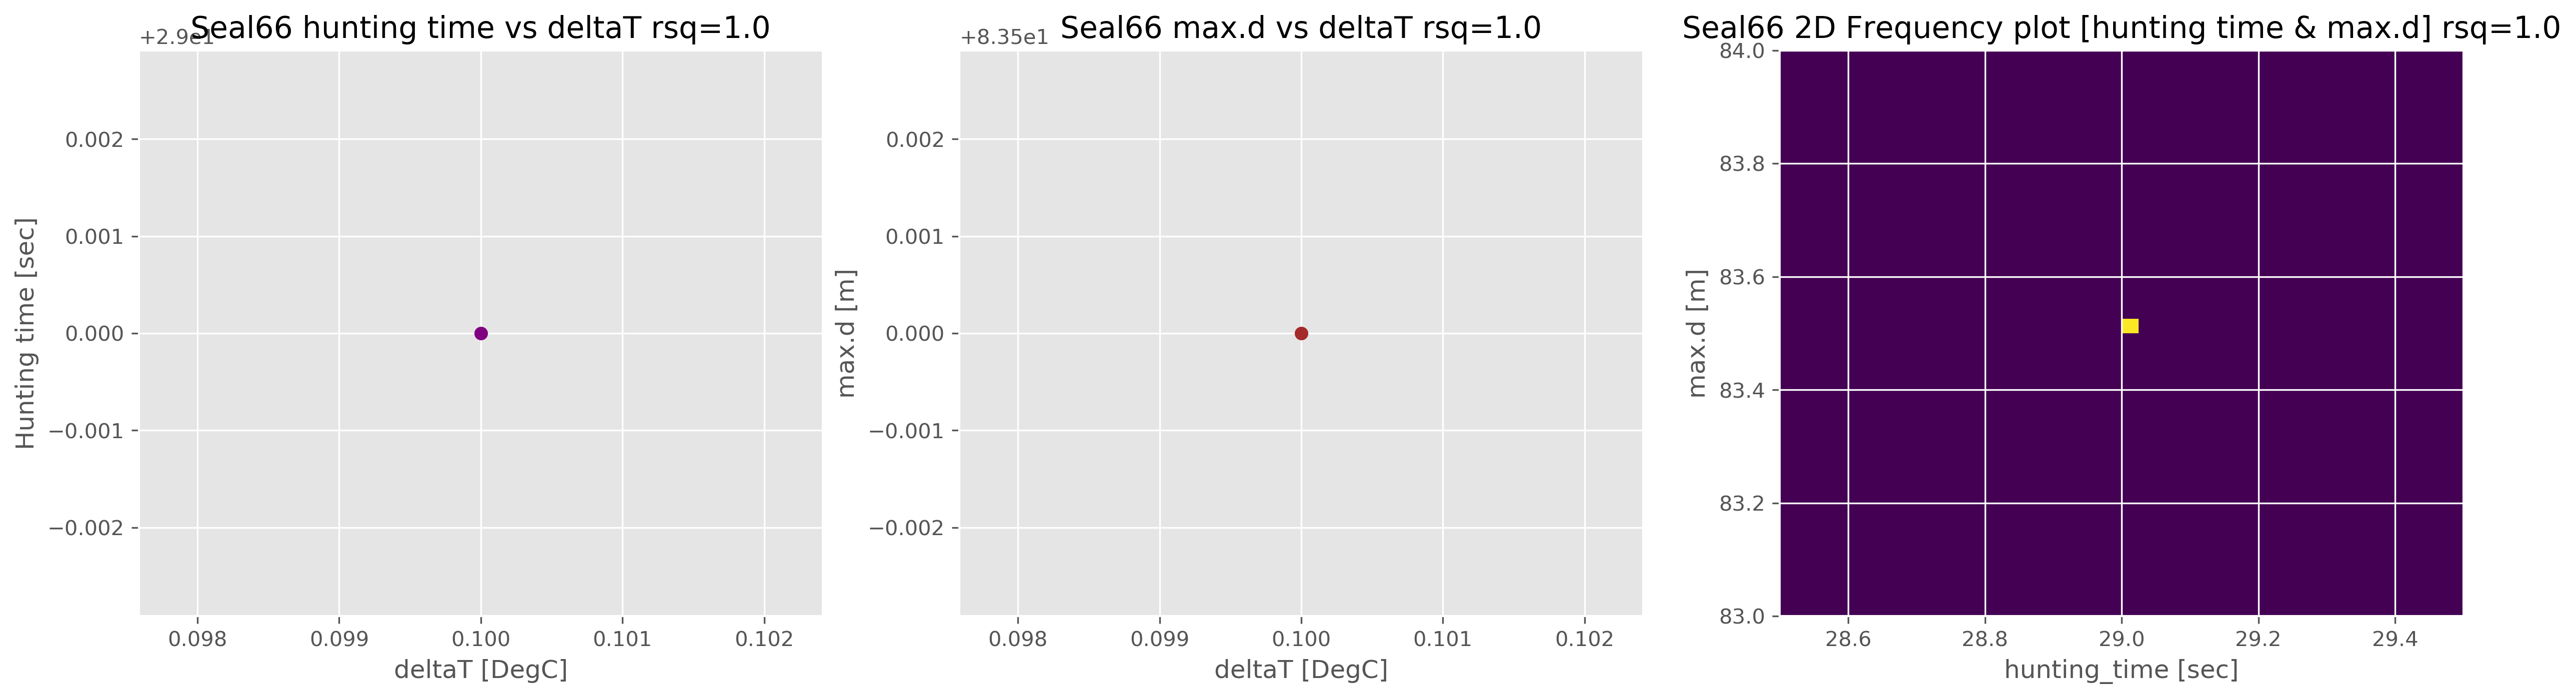

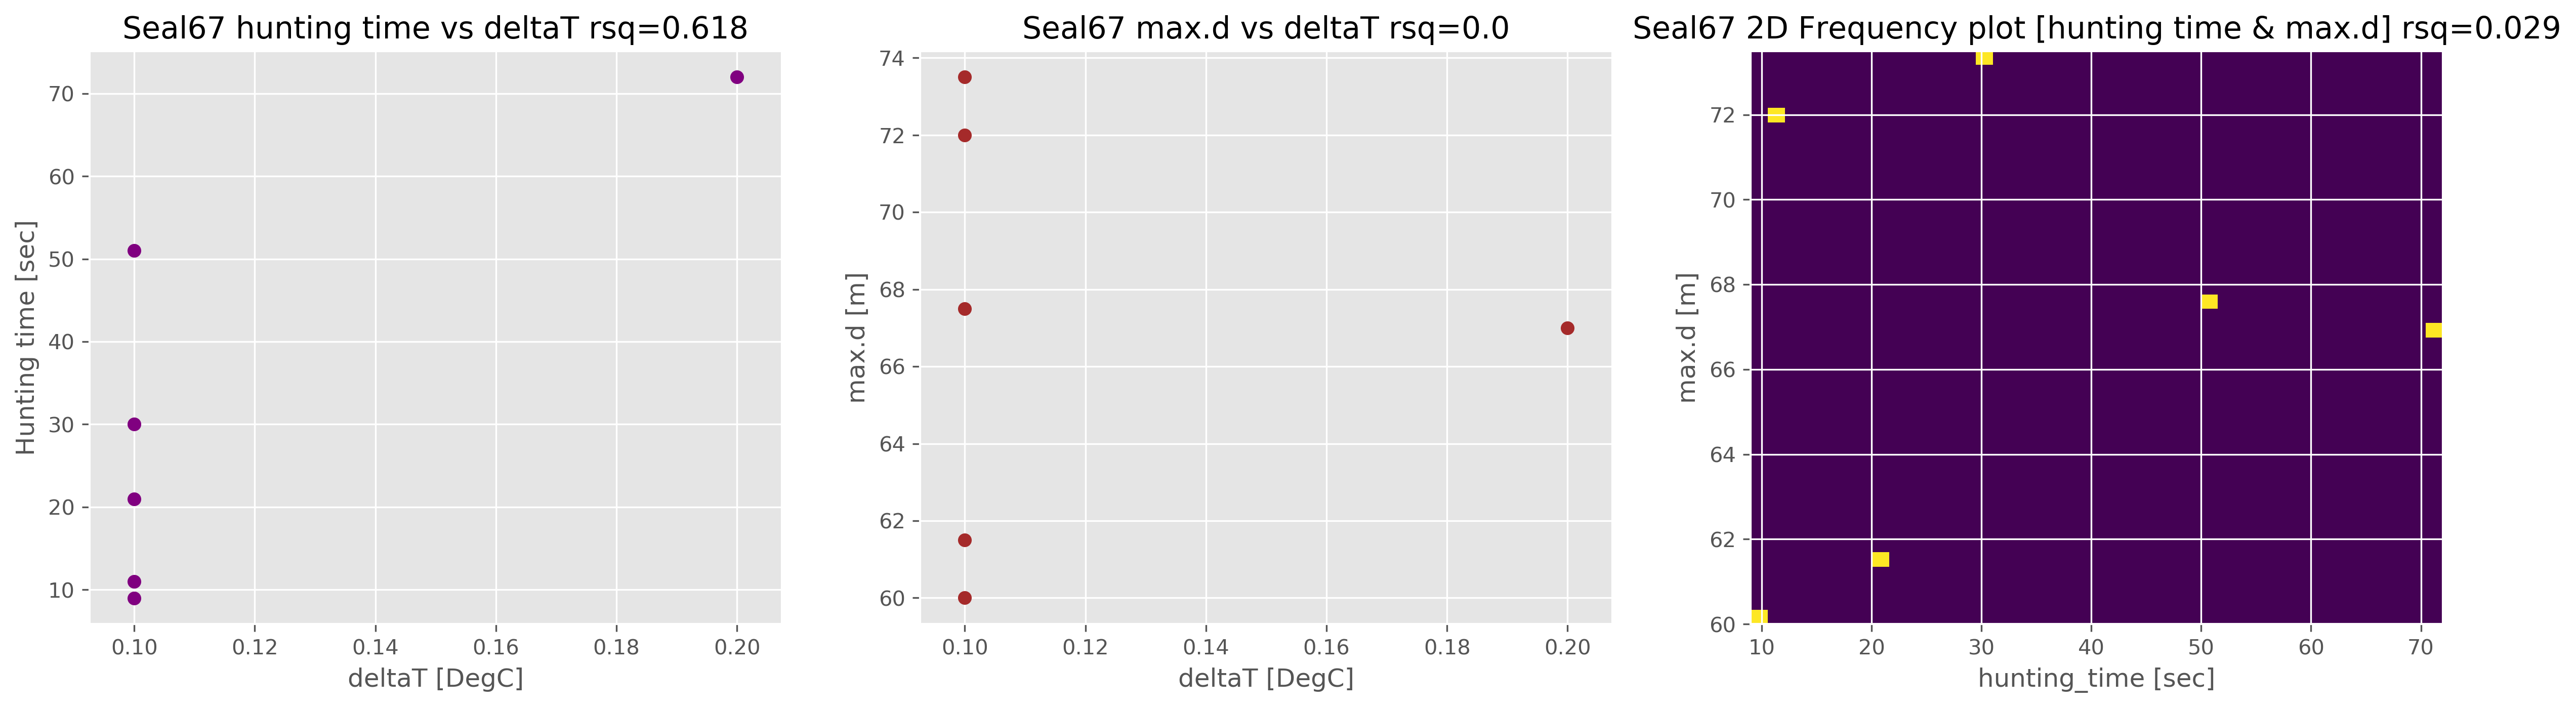

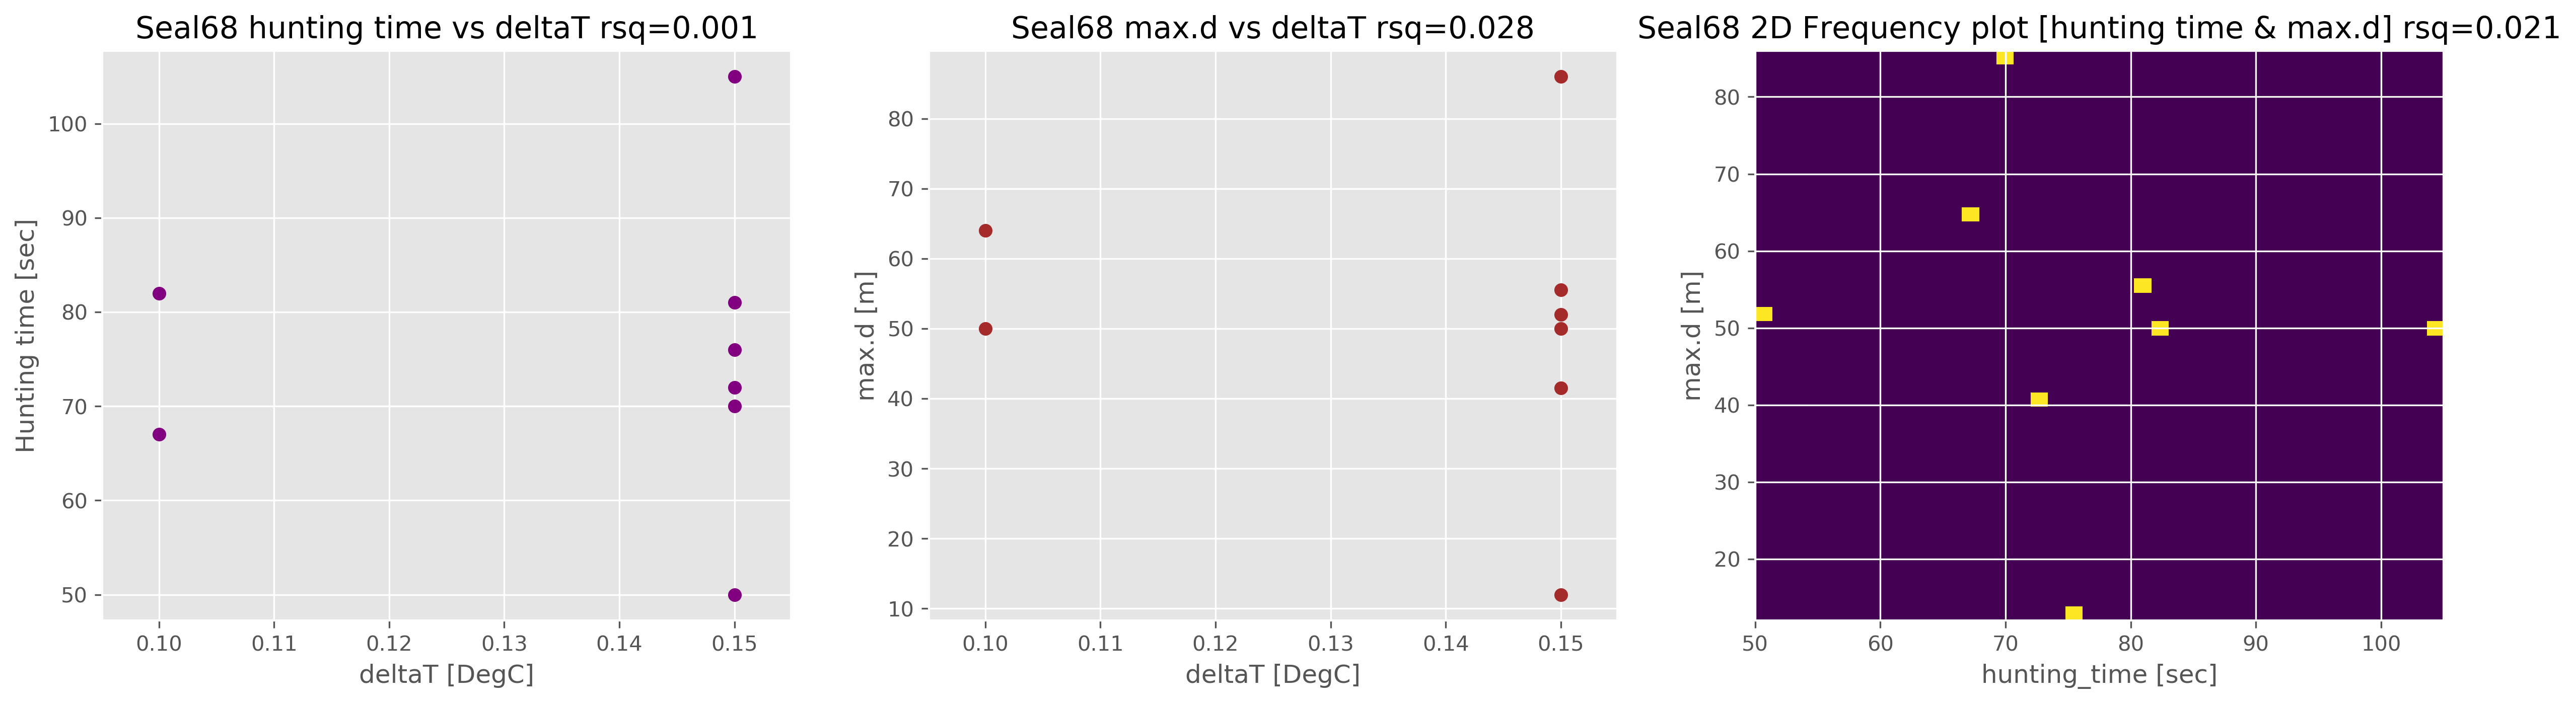

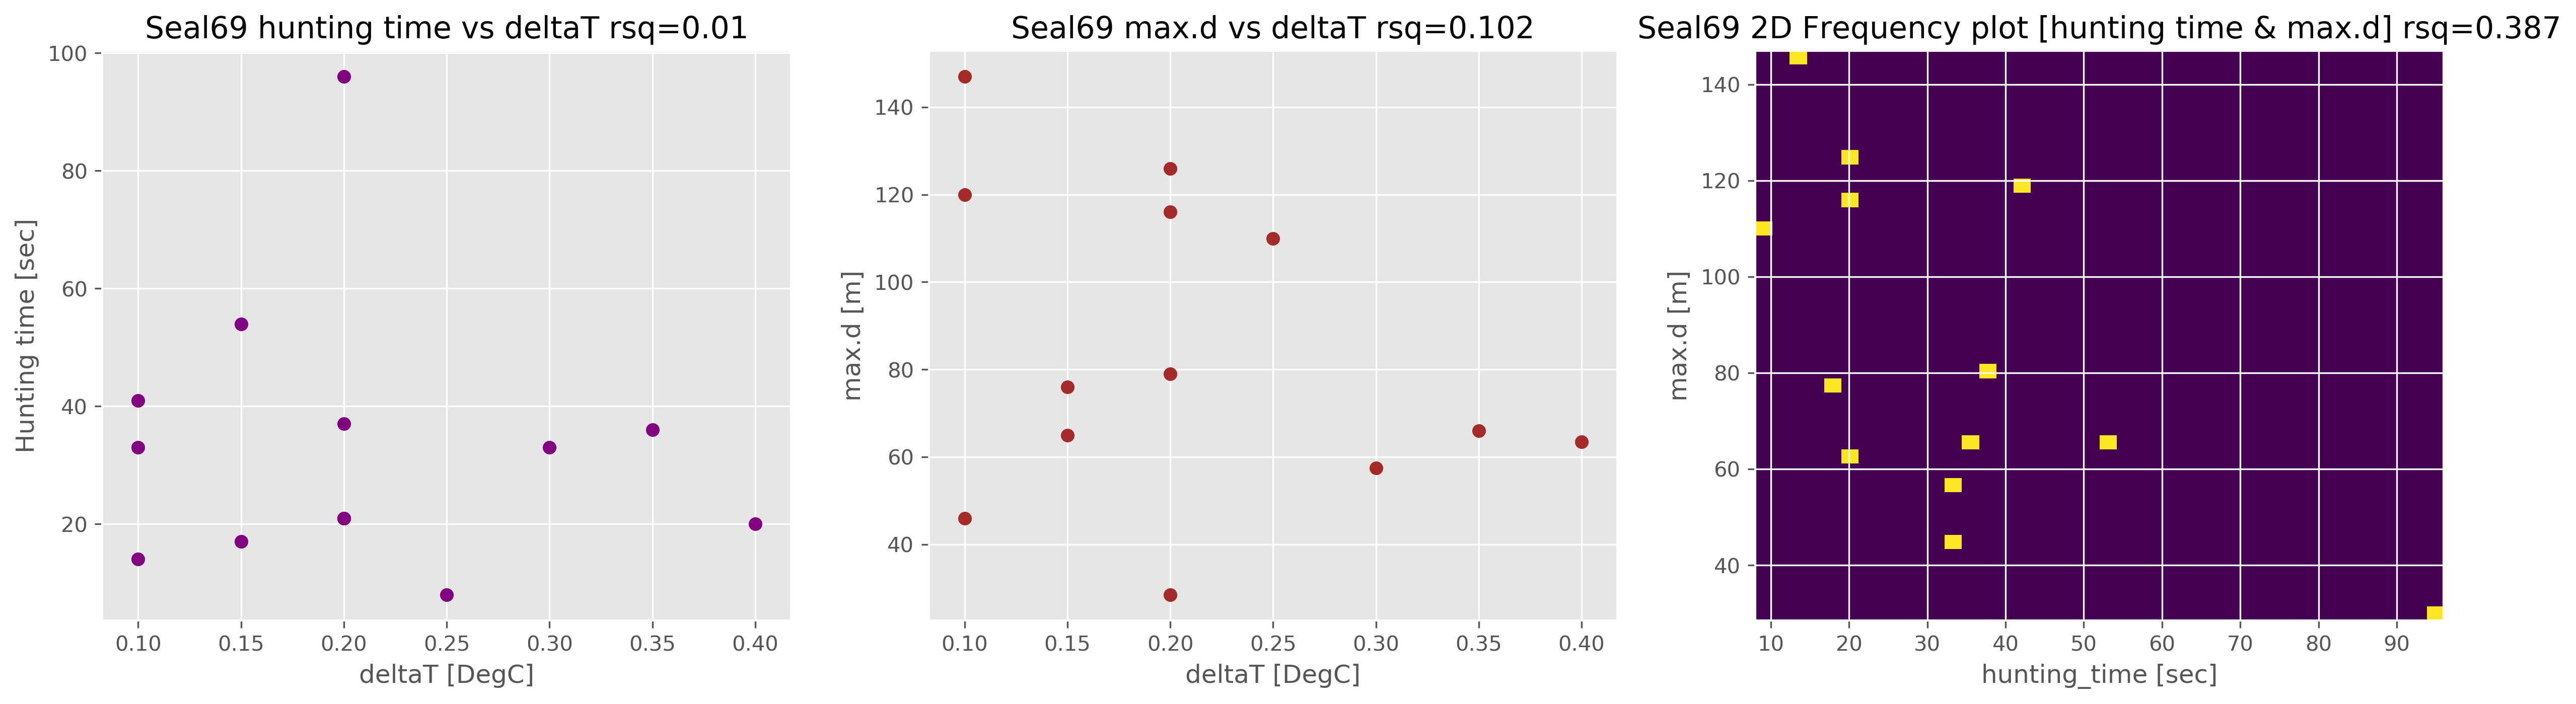

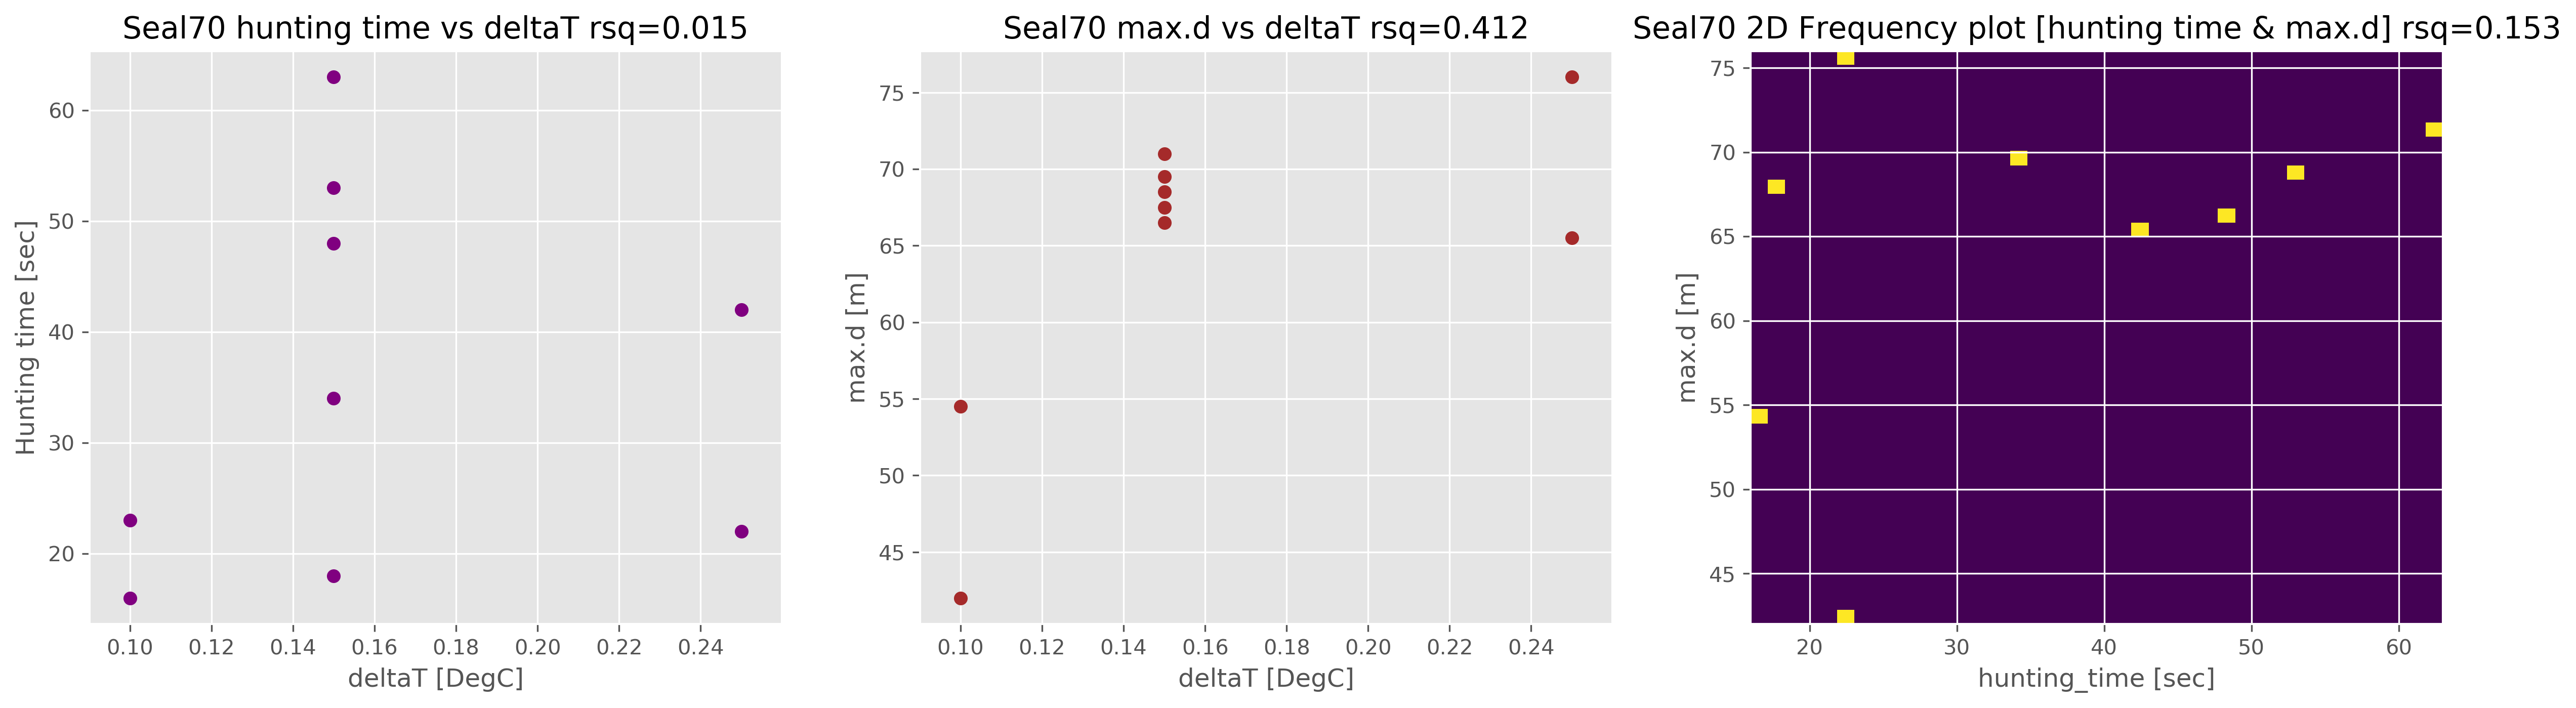

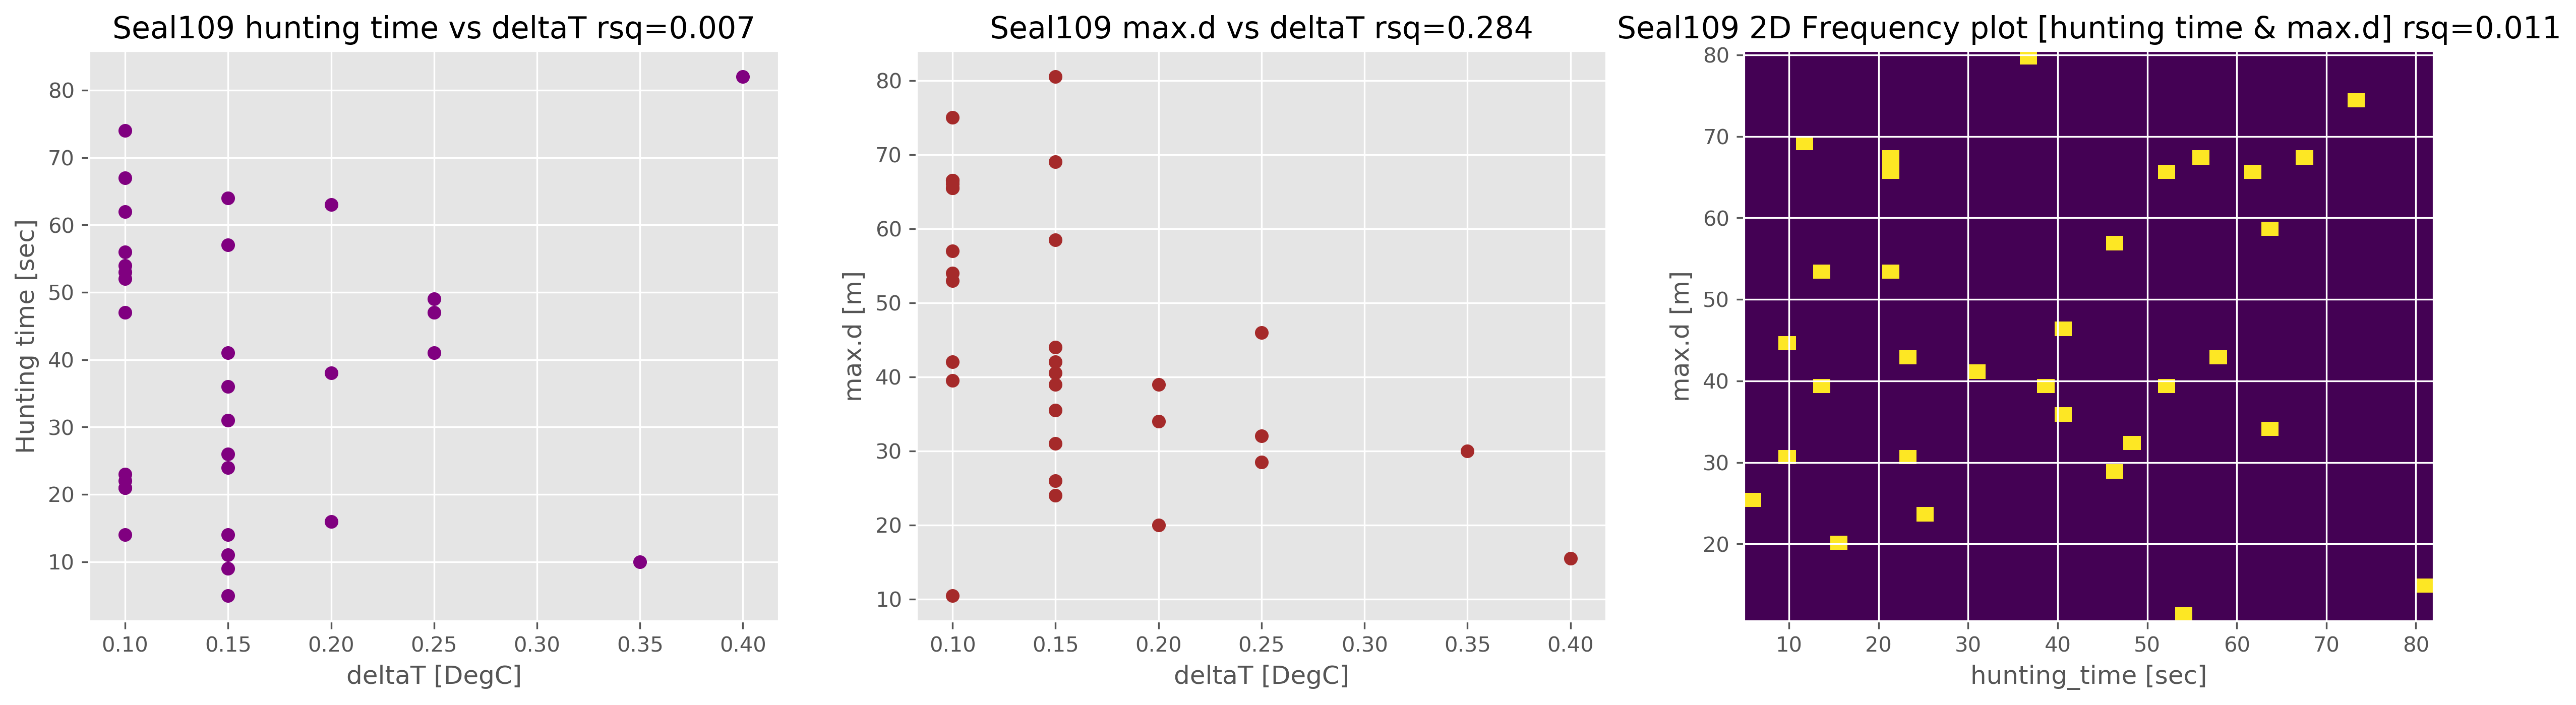

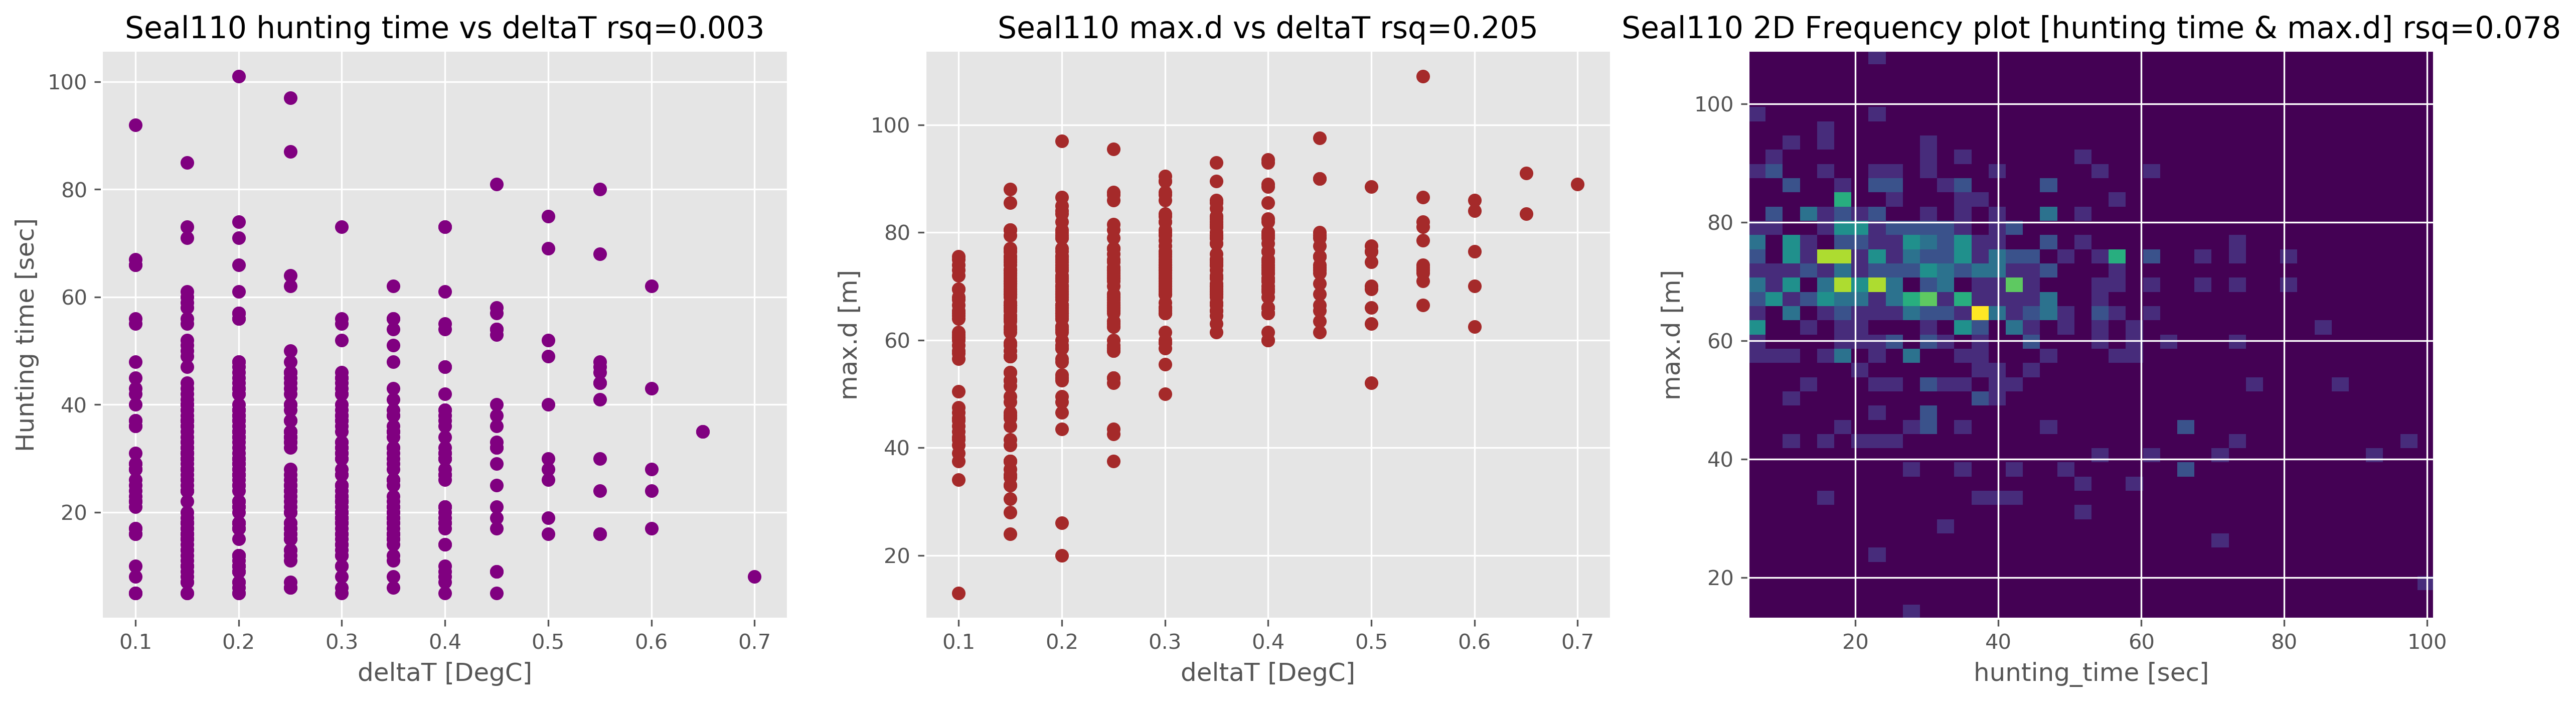

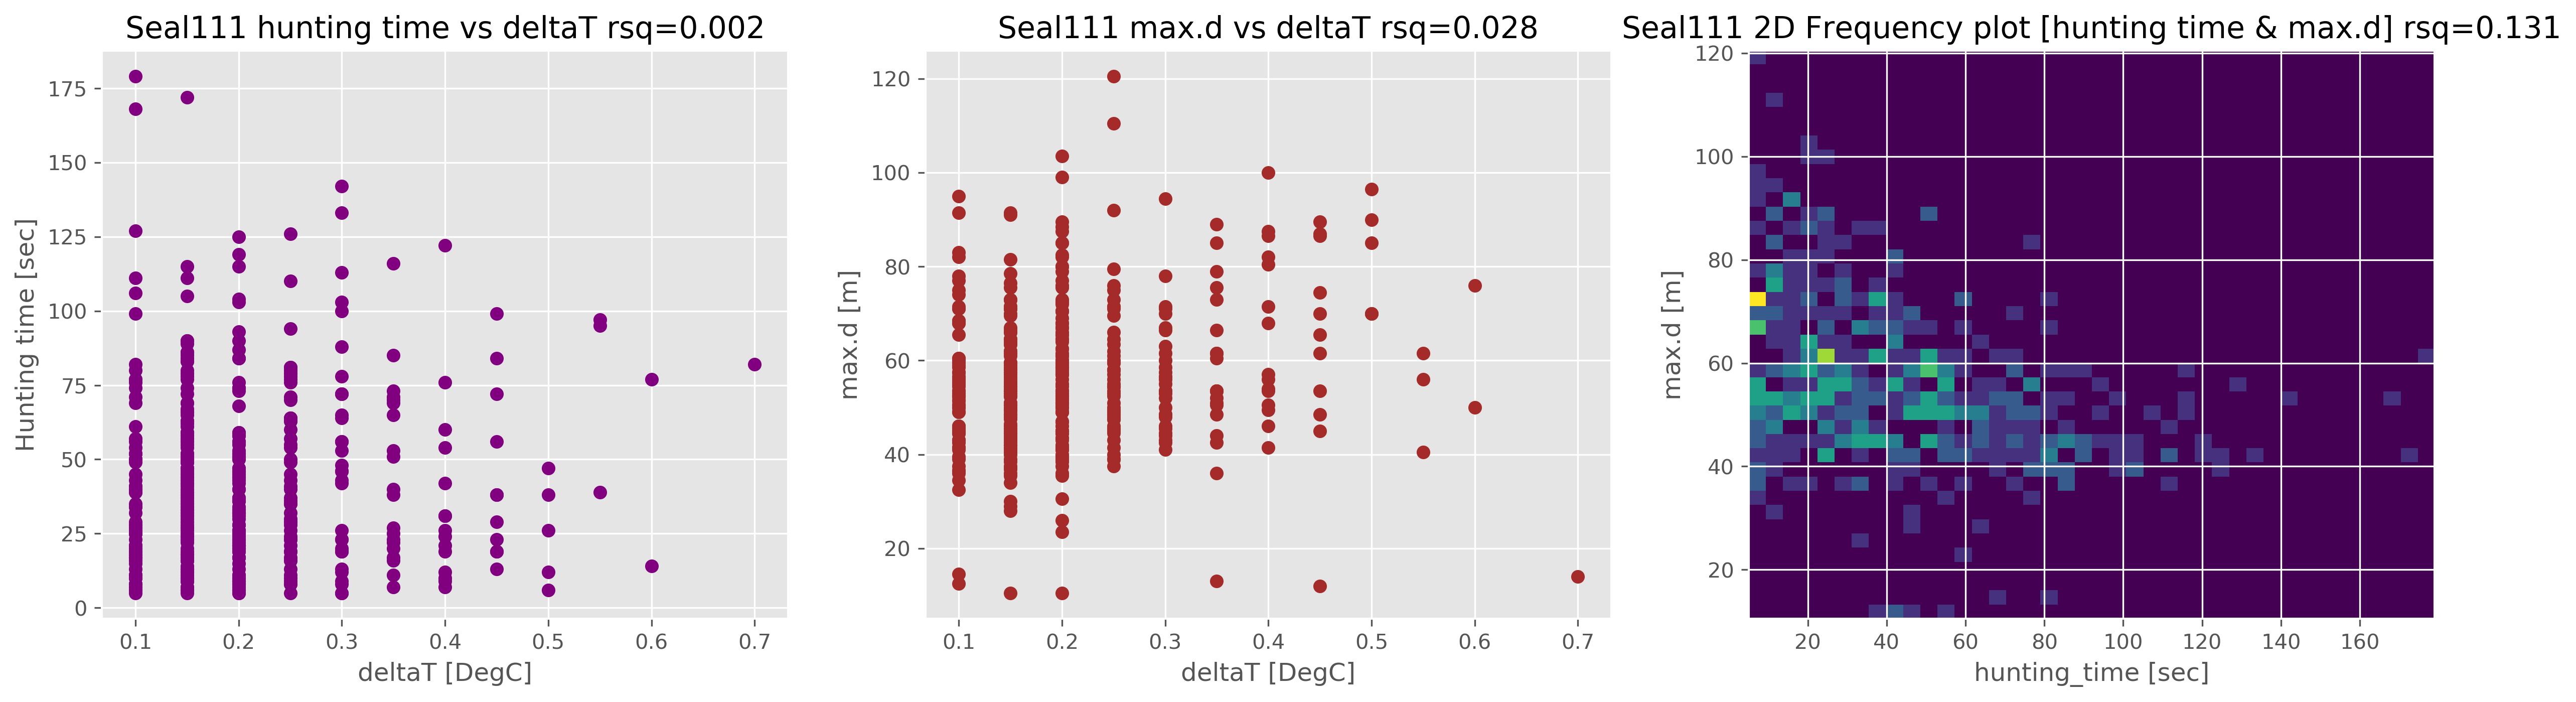

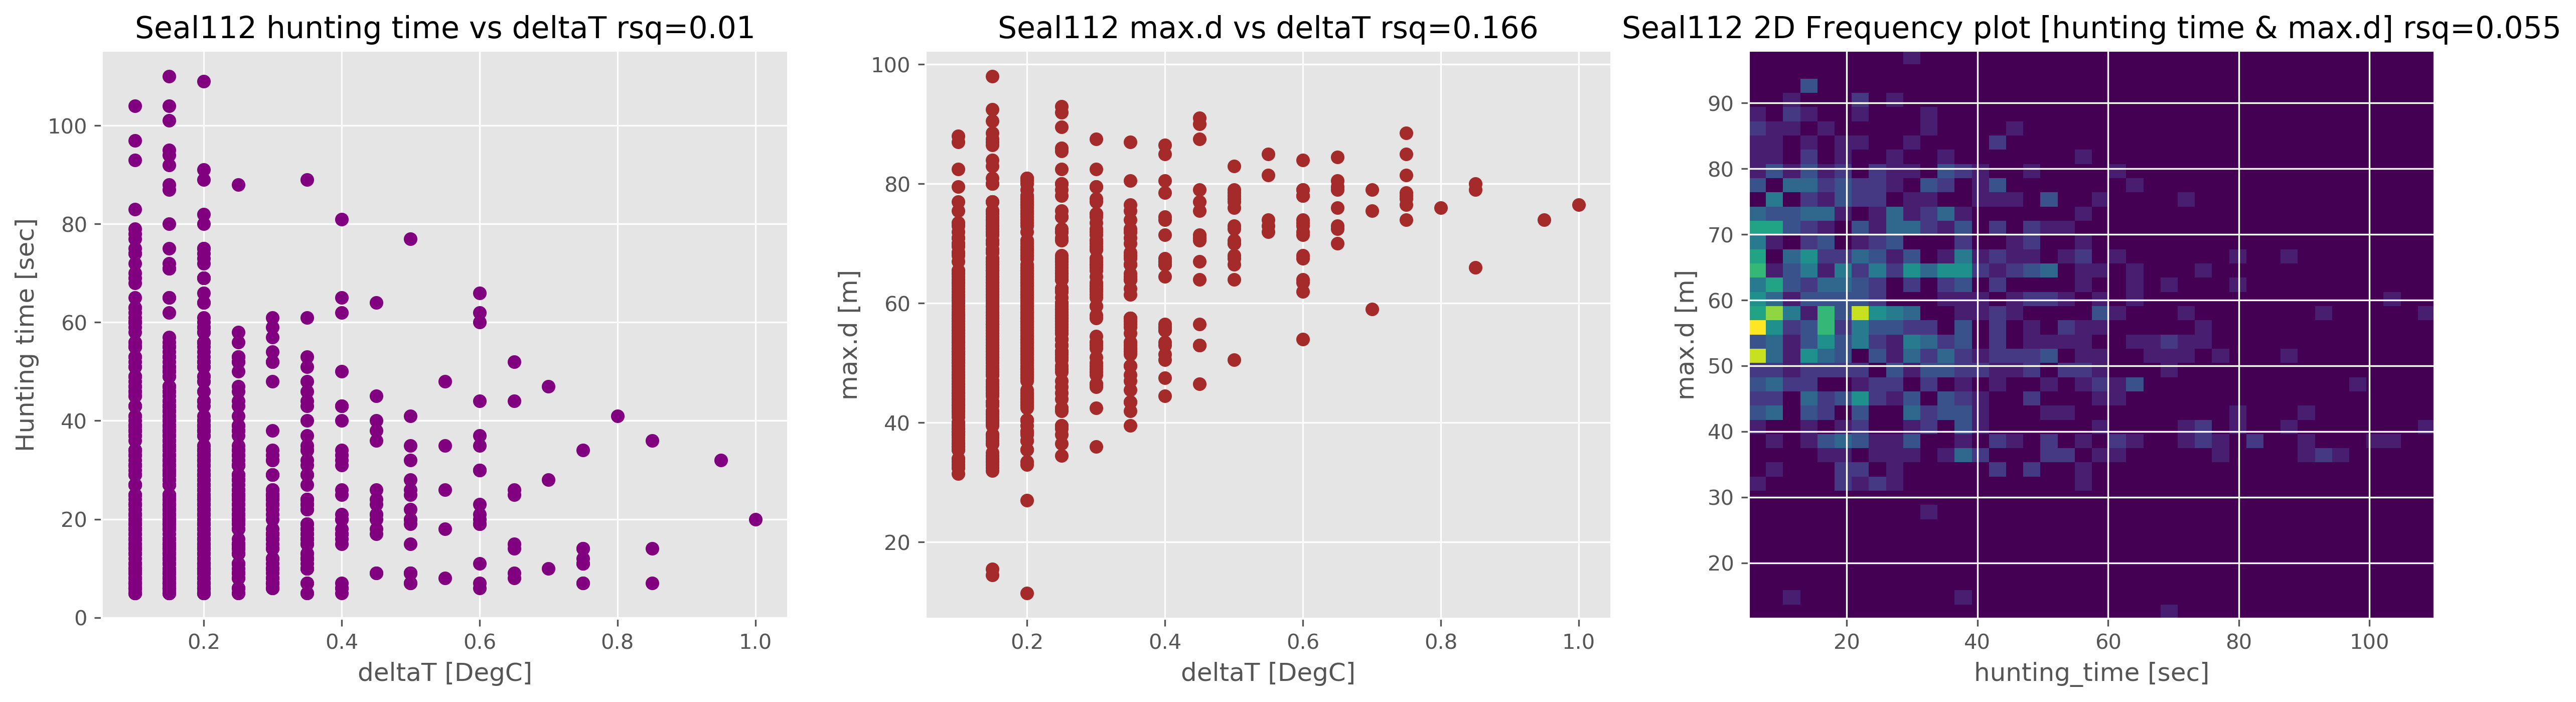

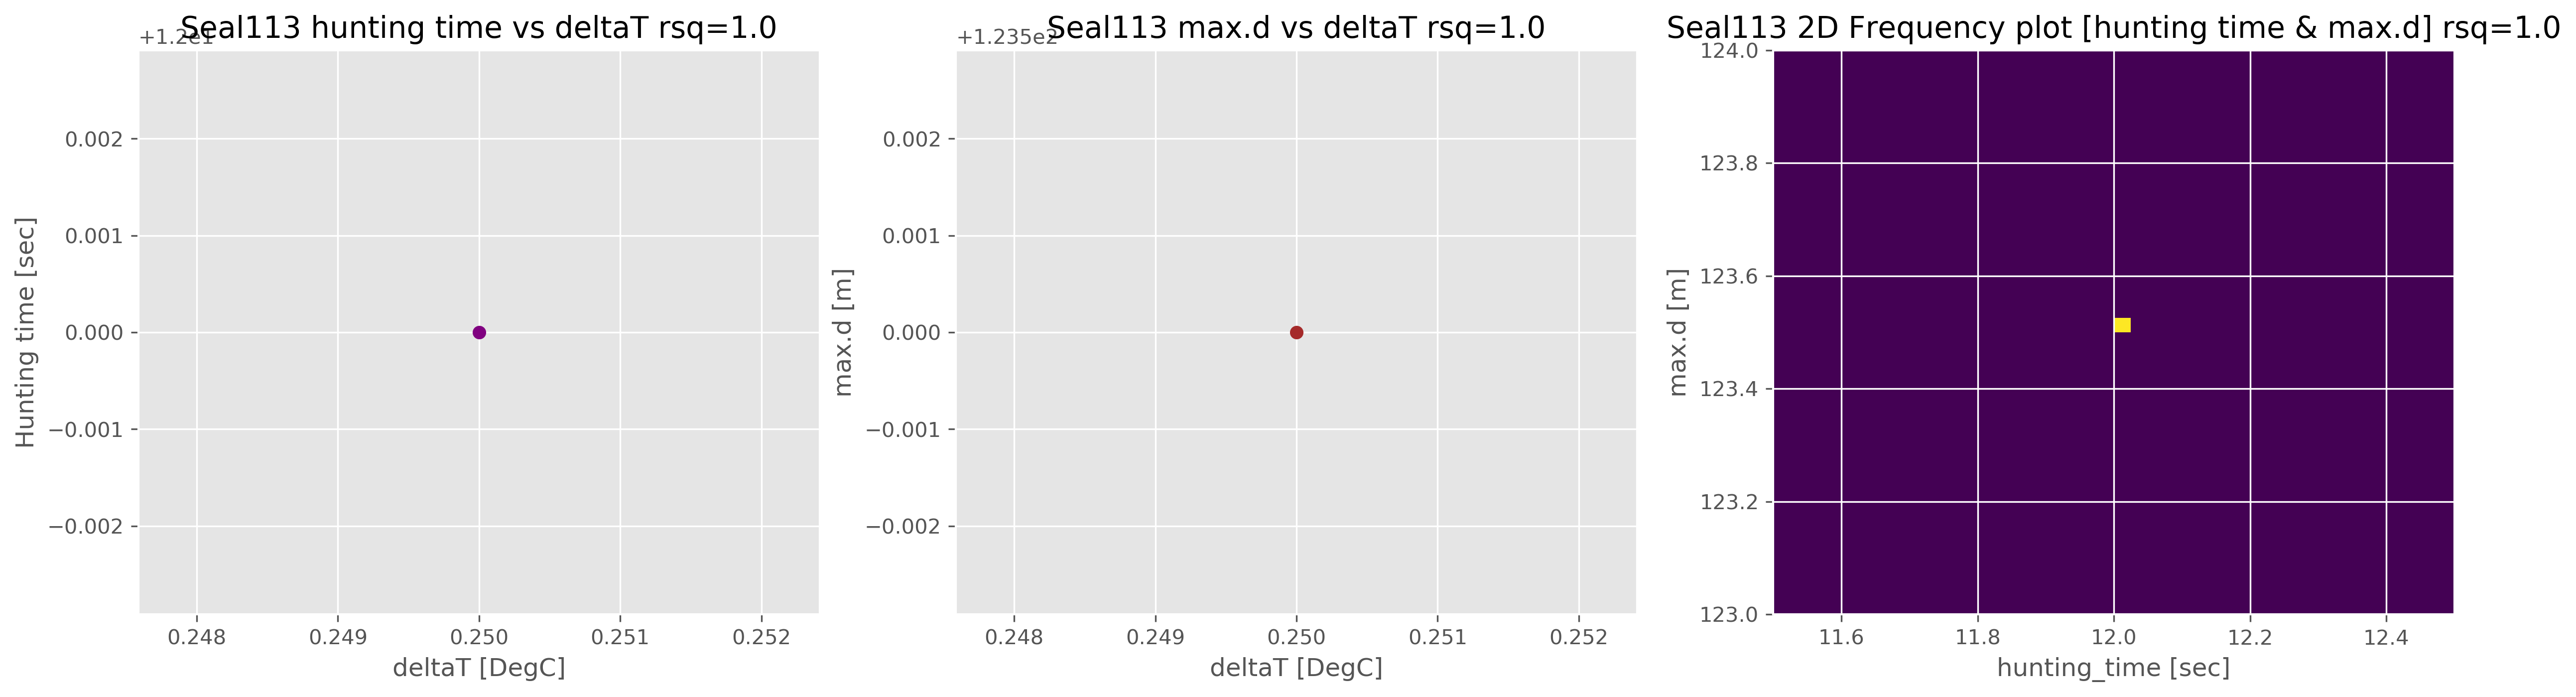

In [64]:
for f in tqdm_notebook(list(range(len(SealIDS)))):
    
    number = SealIDS[f]
    print(number)
    
    import rpy2.robjects as robjects
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    readRDS = robjects.r['readRDS']
    
    bsm_seg_df = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/bsm_seg_df/'+str(number)+'_bsm_seg_df.rds')
    all_dives = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/all_dives/'+str(number)+'_all_dives.rds')
    divestats = readRDS('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/new_divestats/'+str(number)+'_new_divestats.rds')

    bsm_seg_df = pandas2ri.ri2py(bsm_seg_df)
    all_dives = pandas2ri.ri2py(all_dives)
    divestats = pandas2ri.ri2py(divestats)

    ####################
    #%% Correcting Times
    ####################
    
    hours = 2
    hours_subtracted = datetime.timedelta(hours = hours)

    #divestats
    divestats['start'] = divestats['start'] - hours_subtracted
    divestats['end'] = divestats['end'] - hours_subtracted

    #bsm_seg_df\n",
    #bsm_seg_df['start'] = bsm_seg_df['start'] - hours_subtracted
    
    hours = 1
    hours_added = datetime.timedelta(hours = hours)
    
    #divestats
    divestats['local_time'] = divestats['local_time'] + hours_added
    divestats['sunrise'] = divestats['sunrise'] + hours_added
    divestats['sunset'] = divestats['sunset'] + hours_added
    divestats['dawn'] = divestats['dawn'] + hours_added
    divestats['dusk'] = divestats['dusk'] + hours_added

    #bsm_seg_df
    #bsm_seg_df['local_time'] = bsm_seg_df['local_time'] + hours_added
    #bsm_seg_df['sunrise'] = bsm_seg_df['sunrise'] + hours_added
    #bsm_seg_df['sunset'] = bsm_seg_df['sunset'] + hours_added
    #bsm_seg_df['dawn'] = bsm_seg_df['dawn'] + hours_added
    #bsm_seg_df['dusk'] = bsm_seg_df['dusk'] + hours_added
    
    ######################################################
    #%% Create Downcast dataframe (Downcast profiles only)
    #Note: Iterations slow down with time because you are writing to a dataframe each time which increases in size
    ##############################################################################################################
    
    start = bsm_seg_df.groupby('num')['time_start'].min()
    end = all_dives.loc[(all_dives['max.d'] == all_dives['cor.depth']) == True].groupby('num')['Time'].min() # end time of downcast
    all_dives.index = all_dives['Time']
    #del(all_dives['Time'])
    
    all_dives_init = all_dives[['num','cor.depth','External.Temp','gmt']]
    for t in tqdm_notebook(list(range(len(start)))): ## Subsetting downcast and ignoring upcast
        if t == 0:
            Downcast_rdf = all_dives_init.loc[start.iloc[t]:end.iloc[t]]
            Downcast = Downcast_rdf[Downcast_rdf['num'] == start.index[t]].sort_values(by = 'cor.depth' )
        else:
            Downcast_rdf = all_dives_init.loc[start.iloc[t]:end.iloc[t]]
            Down1 = Downcast_rdf[Downcast_rdf['num'] == start.index[t]].sort_values(by = 'cor.depth' )
            Downcast = Downcast.append(Down1)
            Downcast_rdf = Downcast[all_dives_init.columns]
    
    #####################################
    #%% Identifying mld according to Temp
    #####################################
    
    T_diff = pd.DataFrame(Downcast_rdf.groupby('num').apply(lambda x: abs(x.iloc[-1,2]-x.iloc[0,2])),columns=['deltaT'])
    Downcast_rdf = pd.merge(Downcast_rdf,T_diff,on='num',how='outer')
    Downcast_rdf = pd.merge(Downcast_rdf,divestats[['max.d','num']],on='num',how='left')
    meanT_prof = Downcast_rdf.groupby('num').mean().rename(columns={'cor.depth':'mean_cor_depth','External.Temp':'mean_Temp'})
    medianT_prof = Downcast_rdf.groupby('num').median()
    
    divestats = pd.merge(meanT_prof.reset_index(),divestats,how='outer')
    
    ###################################################
    #%% Create gridded xarray using glidertools package
    ###################################################
    time_tmp = np.array(all_dives.groupby('num')['Time'].min())

    ds = divestats.set_index('num')[['distances [m]','lat','lon']].reset_index()
    Down_init = Downcast_rdf
    Down_init['dayofyear'] = Down_init.gmt.dt.dayofyear
    Down_init = pd.merge(ds,Down_init)
    Down_init = pd.merge(divestats[['num','start']],Down_init,how='inner')
    Down_init = pd.merge(all_dives.groupby('num')['Time'].min().reset_index(),Down_init,how='inner')


    dives = np.array(Downcast_rdf['num'])
    depth = np.array(Downcast_rdf['cor.depth'])
    temp = np.array(Downcast_rdf['External.Temp'])
    dist = np.array(Down_init['distances [m]'])/1000
    lat = np.array(Down_init['lat'])*-1
    lon = np.array(Down_init['lon'])
    dist_travelled = np.r_[gt.utils.distance(lon, lat).cumsum()]/1000
    dist_between = np.r_[gt.utils.distance(lon, lat)]/1000
    gmt = np.array(Downcast_rdf['gmt'])
    #time = np.array(Downcast_rdf.index,dtype=float)
    Time = np.array(Down_init['Time'])
    start = np.array(Down_init['start'])
    
    ##############################
    #%% Function for gridding data
    ##############################
    
    custom_bin = np.r_[np.arange(0.5, 201, 1)]
    flr_gridded = gt.grid_data(Time, depth, temp, bins=custom_bin)
    flr_gridded_xds = flr_gridded.rename({'level_0': 'depths','level_1': 'Time'})
    flr_gridded_xds.to_netcdf('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Gridded_Temp_TimeSeries/'+str(number)+'_flr_gridded_xds.nc')

    ###########################################################################################
    ### Identifying Thermocline according to Temp gradient using deltaT/deltad where deltad=1m.
    ###########################################################################################
    
    #%% Sean function

    def calc_mldepths(flr_gridded_xds, TDiff_lim=0.25, deltaT_lim=1, ref_dpt=10): #TDiff_lim=0.05, deltaT_lim=0.5

        """" Therm_dep - Calculate the mixed layer depth from the rate of Temp change method (Where first differential > TDiff_lim [DegC/m])
             Tmld - Calculate the mixed layer depth from absolute diff method (Where T @ surface - T @ depth > 2 [DegC])
        Args:
          var: temperature data file
          dpt: depth data
    
        Return:
            time series of the mixed layer depth
    
        Dependencies:
            numpy
    
        """
        import numpy as np
        num = []
        Tmld = []
        Therm_dep = []
        
        for dive in arange(n): #tqdm_notebook(list(range(n))):
            v = flr_gridded_xds[:,dive].values
            d = flr_gridded_xds.depths.values
    
            try:
                ref_dpt_ind = np.nanargmin(np.abs(d - ref_dpt)) # gets the index for the min value for depth ignoring Nan values.
                v = v[ref_dpt_ind:]
                d = d[ref_dpt_ind:]
                Tdiff_ind = np.where(diff(v)<-TDiff_lim)[0][0]
                Therm_depi = d[Tdiff_ind] 
                Therm_dep += Therm_depi,
                num += T_diff.index[dive],
    
            except:
                Therm_dep += np.NaN,
                num += T_diff.index[dive],
            
            try:
                ref_dpt_ind = np.nanargmin(np.abs(d - ref_dpt)) # gets the index for the min value for depth ignoring Nan values.
                rho_diff = np.abs(v[ref_dpt_ind:] - v[ref_dpt_ind])
                x = rho_diff - deltaT_lim
                x = np.squeeze(np.where(x > 0))[0]
                Tmld_ind = x + ref_dpt_ind
                Tmld += d[Tmld_ind],            
    
            except:
                Tmld += np.NaN,
                #print('MLD not calculated: profile ' + str(n[dive]) + '. Setting to NaN')
    
        return pd.DataFrame({'num':num,'Therm_dep':Therm_dep,'Tmld':Tmld})
    
    ######################
    #%% Executing function
    ######################
    
    n = flr_gridded_xds.shape[1]
    mldepths_gridded = calc_mldepths(flr_gridded_xds)
    
    ##############################################################################
    #%% Identifying dives with thermocline present or absent (stratified vs mixed)
    ##############################################################################
    
    therm = mldepths_gridded.loc[((mldepths_gridded['Therm_dep']>0) & (mldepths_gridded['Tmld']>0)) | (mldepths_gridded['Tmld']>0)] # Hybrid method - All Tmld and Therm_dep except where Tmld > 0 & Therm_dep = NaN & (mldepths['Therm_dep']<mldepths['Tmld'])
    therm['Thermocline'] = 'present'

    mixed = mldepths_gridded.iloc[np.where(mldepths_gridded['Tmld'].isnull() & mldepths_gridded['Therm_dep'].isnull())]
    mixed['Thermocline'] = 'absent'
    merged = therm.append(mixed).sort_values('num')
    
    ########################################################################
    #%% 'Thermocline strength' based on 'thermocline intensity' (Kuhn et al 2011)
    #Note: Determined for dives that are in water masses with thermocline present or absent
    ########################################################################
    
    weak = T_diff.reset_index().iloc[np.where(T_diff.reset_index()['deltaT']>0.2)]
    weak['therm_strength'] = 'weak'

    moderate = T_diff.reset_index().iloc[np.where(T_diff.reset_index()['deltaT']>1.0)]
    moderate['therm_strength'] = 'moderate'

    strong = T_diff.reset_index().iloc[np.where(T_diff.reset_index()['deltaT']>2)]
    strong['therm_strength'] = 'strong'
    
    result = pd.merge(weak,merged,on='num',how='outer').sort_values('num').set_index('num')
    result.update(moderate.set_index('num'))
    result.update(strong.set_index('num'))
    result.deltaT = result.deltaT.fillna(0)
    result = result.drop('deltaT',axis=1)
    divestats = pd.merge(divestats,result,on='num',how='outer').sort_values('num').set_index('num')
    
    ###############
    #%% Nt Function
    ###############
    
    def calc_N_sq(var):

        """Calculate Nt

        Args:
          var: Temperature 

        Return:
            Nt for each depth based on temperature difference

        Dependencies:
            numpy

        """
        import numpy as np
        Nt=[]
        Nt_mean = []

        try:
            T_diff = diff(var)/diff(dpt)
            nt = T_diff*(g*alpha)
            Nt += nt,
            Nt_mean = np.nanmean(nt)
        except:
            Nt += np.NaN,
            Nt_mean = np.NaN

        return np.array(Nt,Nt_mean)

    ###############
    #%% Executing Nt Function
    ###############

    g = 9.8
    alpha = -0.000125
    dpt = flr_gridded_xds.depths.values
    Nt = np.apply_along_axis(calc_N_sq,0,flr_gridded_xds)
    Nt = Nt.squeeze()
    
    Nt_xds = xr.DataArray(data=Nt,dims=["depth","time"],
                 coords={"depth":arange(1,200,1),
                         "time": flr_gridded_xds.Time.values                                     
                        })
    
    #%% Saving Nt dataframe 
    Nt_xds.to_netcdf('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Nt_xds/'+str(number)+'_Nt_xds.nc')
    
    divestats['Nt'] = np.apply_along_axis(nanmean,0,Nt_xds)*1e5
    
    #######################
    #%% Save Summary Data
    #######################
    
    ### Divestats -> Seal_therm_stats

    no_dives = Downcast_rdf['num'].pipe(unique).size
    perc_absent = merged[merged['Thermocline']=='absent'].shape[0]/unique(merged['num']).size*100
    no_present = merged[merged['Thermocline']=='present'].shape[0]
    no_weak_therm = result[result['therm_strength']=='weak'].shape[0]
    perc_weak_therm = result[result['therm_strength']=='weak'].shape[0]/result.shape[0]*100
    no_moderate_therm = result[result['therm_strength']=='moderate'].shape[0]
    perc_moderate_therm = result[result['therm_strength']=='moderate'].shape[0]/result.shape[0]*100
    no_strong_therm = result[result['therm_strength']=='strong'].shape[0]
    perc_strong_therm = result[result['therm_strength']=='strong'].shape[0]/result.shape[0]*100
    Seal = pd.DataFrame(data = {'no_dives':[no_dives],'perc_absent_therm':[perc_absent],'no_present_therm':[no_present],'no_weak_therm':[no_weak_therm],'perc_weak_therm':[perc_weak_therm],'no_moderate_therm':[no_moderate_therm],'perc_moderate_therm':[perc_moderate_therm],'no_strong_therm':[no_strong_therm],'perc_strong_therm':[perc_strong_therm]}, index = ['Seal'+str(number)])
    Seal_tmp = pd.read_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal_therm_stats.csv',index_col=0)
    pd.concat([Seal_tmp, Seal]).to_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal_therm_stats.csv')
    
    ### Divestats -> Seal_diving_stats

    divestats.pdsi[divestats.pdsi<0] = NaN
    divestats.to_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary.csv')
    divestats[divestats['deltaT']>-1].describe().T.to_csv('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/divessummary_describe.csv') 
    
    
    ###########
    #%% Figures
    ###########
    
    #%% Effect of deltaT on max.d and hunting time per dive
    fig = plt.figure(figsize=(20,5), dpi=300)

    deltaT_ = divestats[divestats.hunting_time>0][divestats.deltaT>0.1].deltaT.values.reshape((-1, 1))
    hunting_time_ = divestats[divestats.hunting_time>0][divestats.deltaT>0.1].hunting_time.values.reshape((-1, 1))
    model = LinearRegression().fit(deltaT_,hunting_time_)
    r_sq = model.score(deltaT_,hunting_time_)

    ax1 = fig.add_subplot(1,3,1)
    plt.scatter(divestats[divestats.hunting_time>0][divestats.deltaT>0.1].deltaT.values,divestats[divestats.hunting_time>0][divestats.deltaT>0.1].hunting_time, c='purple')
    plt.xlabel('deltaT [DegC]')
    plt.ylabel('Hunting time [sec]')
    plt.title('Seal' + str(number) + ' hunting time vs deltaT rsq=' + str(round(r_sq,3)))

    max_d_ = divestats[divestats.hunting_time>0][divestats.deltaT>0.1]['max.d'].values.reshape((-1, 1))
    model = LinearRegression().fit(deltaT_,max_d_)
    r_sq = model.score(deltaT_,max_d_)

    ax2 = fig.add_subplot(1,3,2)
    plt.scatter(divestats[divestats.hunting_time>0][divestats.deltaT>0.1].deltaT.values,divestats[divestats.hunting_time>0][divestats.deltaT>0.1]['max.d'],c='brown')
    plt.xlabel('deltaT [DegC]')
    plt.ylabel('max.d [m]')
    plt.title('Seal' + str(number) + ' max.d vs deltaT rsq=' + str(round(r_sq,3)))

    model = LinearRegression().fit(max_d_,hunting_time_)
    r_sq = model.score(max_d_,hunting_time_)

    ax3 = fig.add_subplot(1,3,3)
    plt.hist2d(divestats[divestats.hunting_time>0][divestats.deltaT>0.1].hunting_time,divestats[divestats.hunting_time>0][divestats.deltaT>0.1]['max.d'],bins=40)
    plt.xlabel('hunting_time [sec]')
    plt.ylabel('max.d [m]')
    plt.title('Seal' + str(number) + ' 2D Frequency plot [hunting time & max.d] rsq=' + str(round(r_sq,3)))

    fig.savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/Dive variables.png', dpi=300)

    #%% Setting up data squeezed data for plotting
    
    ### Preparing axes for plotting on scatter plot

    ### Temp & Depth
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i==0:
            initiate_temp = flr_gridded_xds.values[:,i]
            initiate_depths = flr_gridded_xds.depths
        if i==1: 
            flattened_gridded_temp = concatenate((initiate_temp,flr_gridded_xds.values[:,i]))
            flattened_gridded_depths = concatenate((initiate_depths,flr_gridded_xds.depths))
        
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i>1:
            flattened_gridded_temp = concatenate((flattened_gridded_temp,flr_gridded_xds.values[:,i]))
            flattened_gridded_depths = concatenate((flattened_gridded_depths,flr_gridded_xds.depths))

    ### Time
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i==0:
            initiate_Time = flr_gridded_xds.Time.values[i]
            initiate_Time = np.repeat(initiate_Time,200)
        if i==1: 
            flattened_gridded_Time = flr_gridded_xds.Time.values[i]
            flattened_gridded_Time = concatenate((initiate_Time,np.repeat(flattened_gridded_Time,200)))
        
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i>1:
            tmp_flattened_gridded_Time = flr_gridded_xds.Time.values[i]
            flattened_gridded_Time = concatenate((flattened_gridded_Time,np.repeat(tmp_flattened_gridded_Time,200)))
        
    ### Time as gmt
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i==0:
            initiate_Time = flr_gridded_xds.Time.values[i]
            initiate_Time = np.repeat(initiate_Time,200)
        if i==1: 
            flattened_gridded_Time = flr_gridded_xds.Time.values[i]
            flattened_gridded_Time = concatenate((initiate_Time,np.repeat(flattened_gridded_Time,200)))
        
    for i in arange(len(flr_gridded_xds.Time.values)):
        if i>1:
            tmp_flattened_gridded_Time = flr_gridded_xds.Time.values[i]
            flattened_gridded_Time = concatenate((flattened_gridded_Time,np.repeat(tmp_flattened_gridded_Time,200)))
        
    flattened_gridded_gmt = pd.to_timedelta(flattened_gridded_Time + 7200, unit='s') + pd.to_datetime('1970-01-01')
    
    ########################
    #%% Vertically gridded Temperature

    fig, ax = plt.subplots(1,1,figsize=[12, 5], dpi=300)

    p1 = gt.plot.scatter(flattened_gridded_gmt,flattened_gridded_depths,flattened_gridded_temp,s=0.5,cmap=cmo.thermal,ax=ax,marker='.',robust=True) # 'Robust' removes outliers - uses the 2nd and 98th percentiles of the data to compute the color limits.
    p1.set_ylim(200,0)
    p1.set_ylabel('Depth [m]')
    p1.set_xlabel('Start time of dive')
    ax2 = ax.twinx()

    #%% Gridded Temp Time Series
    ax2.scatter(flattened_gridded_gmt,flattened_gridded_temp,s=0.3,marker='.')
    ax2.set_xlim(min(flattened_gridded_gmt),max(flattened_gridded_gmt))
    ax2.set_ylim(2,20)
    ax2.set_ylabel('Temp [DegC]',color='r')
    ax2.set_title('Time series of Temp')

    ax.cb.set_label('Temp [DegC]',labelpad=6)
    ax.set_facecolor('xkcd:light grey') # https://xkcd.com/color/rgb/  for colours (greyish/lightgrey/warm grey/sky blue/black)
    ax2.set_facecolor('xkcd:light grey')
    ax.cb.remove()
    ax2.grid(False)
    ax.grid(False)
    ax2.spines['right'].set_color('red')
    ax2.xaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    fig.tight_layout()
    fig.savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/Profiles/T gridded profile plots.png', dpi=300)

    plt.clf()
    plt.close()
    
    ########################
    #%% Nt
    
    ### Frequency plot
    #fig = plt.figure()

    #plt.hist(np.apply_along_axis(nanmean,0,Nt_xds)*1e5,20,color='black')
    #plt.xlabel('Nt [1e-5/sec2]')
    #plt.ylabel('Count')

    #fig.savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/Nt_graph.png', dpi=300)

    ### 2D plot
    if (Nt.squeeze()[:,therm.index].shape[1]>0):
        fig, ax = plt.subplots(1,1,figsize=[12, 5], dpi=300)

        p1 = gt.plot(Nt.squeeze()[:,therm.index], cmap=cmo.balance, ax=ax, vmax=0.0002, vmin=-0.0002)
        p1.set_ylim(160,0)
        ax2 = ax.twinx()

        #%% Gridded Nt Time Series of thermocline dives (Dives that are deeper than the thermocline)\n",
        ax2.plot(therm.Therm_dep.reset_index()['Therm_dep'].index+0.5,therm.Therm_dep.reset_index()['Therm_dep'],alpha=0.9, c='g',linewidth=2)
        plt.title('Dives below thermocline n=' + str(len(therm)) + ' (%' + "{:.3f}".format(len(therm)/flr_gridded_xds.shape[1]) + ' of dives)')
        plt.ylim(160,0)
        plt.yticks([])
        # For discretizing graph - levels=[0, 12, 18, 30] or Levels=8
    
        #%% Gridded Nt Time Series of thermocline dives (Dives that are deeper than the thermocline)
        ax2.plot(arange(len(mldepths_gridded.loc[mldepths_gridded['Tmld']>0].Tmld))+0.5,mldepths_gridded.loc[mldepths_gridded['Tmld']>0].Tmld,alpha=0.9, c='black',linewidth=1)
        plt.title('Dives below thermocline n=' + str(len(therm)) + ' (' + str("{:.3f}".format(len(therm)*100/flr_gridded_xds.shape[1])) + '% of dives)')
        plt.ylim(160,0)
        plt.yticks([])
    
        ax2.legend(loc='best')
        ax.cb.set_label('Nt [1/s^2]',labelpad=6)
    
        ax.set_facecolor('xkcd:light grey') # https://xkcd.com/color/rgb/  for colours (greyish/lightgrey/warm grey/sky blue/black)


        fig.tight_layout()
        fig.savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Seal'+str(number)+'/Profiles/Nt & Therm depth1.png', dpi=300)

        plt.clf()
        plt.close()
        
    del[divestats,flattened_gridded_gmt,flattened_gridded_Time,flattened_gridded_temp,flattened_gridded_depths,bsm_seg_df,all_dives,Nt,flr_gridded_xds,mldepths_gridded,result,Downcast_rdf,Down_init,mixed,therm,Downcast]